In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from astropy.coordinates import Angle
from scipy import ndimage
import radio_beam
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
import os.path
import glob
from pyBBarolo.wrapper import BBaroloWrapper

In [2]:
califaoutpath = '/vol/aibn1081/data1/brodriguez/CALIFA/'
acaoutpath    = '/vol/aibn1081/data1/brodriguez/ACA/'
califainpath  = '/vol/alcina/data1/shared/EDGE/PIPE3DS_v2.3/'
acainpath     = '/vol/alcina/data1/shared/EDGE/aca_edge_natv/cubes/'

# Create list of sources in table form

In [3]:
califapattern = os.path.join(califainpath,"*.Pipe3D.cube.fits.gz")
acapattern = os.path.join(acainpath,"*_7m_co21_pbcor.fits")
print("CALIFA input pattern:",califapattern)
print("ACA input pattern:",acapattern)
califafilepaths = sorted(glob.glob(califapattern))
acafilepaths = sorted(glob.glob(acapattern))

CALIFA input pattern: /vol/alcina/data1/shared/EDGE/PIPE3DS_v2.3/*.Pipe3D.cube.fits.gz
ACA input pattern: /vol/alcina/data1/shared/EDGE/aca_edge_natv/cubes/*_7m_co21_pbcor.fits


In [4]:
califa_sources = [filename.replace('.Pipe3D.cube.fits.gz','').replace(califainpath,'') for filename in califafilepaths]
aca_sources = [filename.replace('_7m_co21_pbcor.fits','').replace(acainpath,'') for filename in acafilepaths]
#sources = aca_sources[np.isin(aca_sources,califa_sources)]

In [86]:
califa_filenames = ['CGCG429-012','IC1079','IC1528','IC2341','MCG-01-01-012','MCG-01-10-015','MCG-01-52-012','MCG-02-02-030','MCG-02-51-004',
 'NGC0001','NGC0155','NGC0169_2','NGC0171','NGC0180','NGC0693','NGC0731','NGC0768','NGC0955',
 'NGC1056','NGC1542','NGC2449','NGC2540','NGC2554','NGC2595','---','NGC3300','NGC6427','NGC7025',
 'NGC7194','NGC7311','NGC7321','NGC7364','NGC7466','NGC7489','NGC7625','NGC7716','UGC00312',
 'UGC00335NED02_0','UGC01123','UGC01368','UGC01938','UGC02099','UGC04240','UGC04245',
 'UGC04455','UGC05396','UGC08322','UGC08781','UGC10972','UGC11649','UGC11680NED02','---',
 'UGC11792','UGC11958_1','UGC11982','UGC12224','UGC12250','UGC12274','UGC12348','VV488NED02']

In [19]:
RA = Angle(["22h 36m 49.8s","14h 56m 36.1s","00h 05m 05.3s","08h 23m 41.4s","23h 59m 10.8s","03h 38m 39.1s",
"20h 37m 49.9s","00h 30m 07.3s","20h 15m 39.8s","00h 07m 15.8s","00h 34m 40.0s","00h 36m 51.7s",
"00h 37m 21.5s","00h 37m 57.7s","01h 50m 30.8s","01h 54m 56.2s","01h 58m 40.9s","02h 30m 33.1s",
"02h 42m 48.3s","04h 17m 14.1s","07h 47m 20.2s","08h 12m 46.4s","08h 17m 53.5s","08h 27m 41.9s",
"08h 27m 26.4s","10h 36m 38.4s","17h 43m 38.5s","21h 07m 47.3s","22h 03m 30.9s","22h 34m 06.7s",
"22h 36m 28.0s","22h 44m 24.3s","23h 02m 03.4s","23h 07m 32.6s","23h 20m 30.0s","23h 36m 31.4s",
"00h 31m 23.9s","00h 33m 57.3s","01h 34m 07.9s","01h 54m 13.1s","02h 28m 22.1s","02h 37m 13.0s",
"08h 08m 06.1s","08h 08m 45.7s","08h 31m 32.8s","10h 01m 40.4s","13h 15m 00.9s","13h 52m 22.7s",
"17h 46m 21.8s","20h 55m 27.6s","21h 07m 45.8s","21h 18m 35.4s","21h 42m 12.7s","22h 14m 46.8s",
"22h 18m 52.9s","22h 52m 38.3s","22h 55m 35.8s","22h 58m 19.5s","23h 05m 18.8s","22h 56m 50.8s"]).degree

In [183]:
DEC = Angle(["14:23:13.1d","09:22:11.1d","-07:05:36.3d","21:26:05.5d","-04:11:30.6d","-05:20:50.4d","-06:05:26.7d",
"-11:06:49.1d","-13:37:19.3d","27:42:29.7d","-10:45:59.4d","23:59:25.3d","-19:56:03.3d","08:38:06.7d",
"06:08:42.8d","-09:00:38.9d","00:31:45.2d","-01:06:30.3d","28:34:26.8d","04:46:53.9d","26:55:49.1d",
"26:21:42.6d","23:28:19.9d","21:28:44.7d","17:17:02.3d","14:10:16.1d","25:29:38.1d","16:20:09.1d",
"12:38:12.4d","05:34:11.6d","21:37:18.5d","-00:09:43.5d","27:03:10.1d","22:59:53.6d","17:13:35.0d",
"00:17:50.2d","08:28:00.6d","07:16:05.9d","-01:01:56.2d","07:53:01.1d","23:12:52.7d","21:34:04.0d",
"14:50:16.3d","18:11:39.0d","-01:11:51.8d","10:45:23.0d","12:43:31.0d","21:32:22.0d","26:32:36.9d",
"-01:13:30.9d","03:52:40.4d","19:43:07.0d","05:36:55.1d","13:50:27.2d","-01:03:31.2d","06:05:37.2d",
"12:47:24.9d","26:03:43.3d","00:11:22.3d","-08:58:03.1d"]).degree

In [21]:
inclinations = [60,50,70,60,90,73,43,70,68,34,40,72,33,45,90,20,68,90,53,90,70,55,47,35,68,57,70,54,43,62,
56,54,66,63,40,44,63,50,75,73,78,66,76,70,47,75,73,50,78,42,40,60,78,50,78,45,53,73,75,82]

In [22]:
PAs = [4,81,72,2,70,75,72,170,159,110,169,87,101,163,106,155,28,19,162,127,135,123,153,30,63,173,
35,44,17,11,17,66,25,165,45,34,7,147,70,51,155,138,178,107,13,145,36,161,55,90,205,39,160,143,
171,46,12,142,136,73]

In [23]:
redshifts = [0.01751,0.02907,0.0125,0.01701,0.01883,0.01343,0.0127,0.01179,0.01876,0.01511,0.02053,0.01525,
0.01277,0.01743,0.00498,0.01296,0.02308,0.00489,0.00528,0.01235,0.01652,0.02088,0.01365,0.01429,
0.01964,0.01012,0.01088,0.01639,0.02713,0.01495,0.02372,0.01605,0.02483,0.02071,0.00557,0.00851,
0.01424,0.01812,0.01615,0.02653,0.02108,0.02737,0.02886,0.01733,0.03044,0.01798,0.0254,0.02513,
0.01539,0.01252,0.02615,0.02088,0.01586,0.02618,0.01554,0.01156,0.02405,0.02538,0.0251,0.01632]

In [85]:
Dist = [84,114,48,75,78,90,100,42,90,74,65,98,57,61,17,55,80,24,30,70,43,75,60,64,82,47,45,75,123,
        61,104,68,92,70,24,36,57,78,54,108,96,118,163,75,128,76,98,115,63,60,111,90,68,112,69,50,92,110,108,70]

In [84]:
Re_arcsec = [5.3,19.3,16.9,8.0,11.2,11.8,4.5,13.9,15.8,9.2,13.5,19.4,15.8,20.2,11.6,10.4,15.6,9.4,7.9,9.5,
12.8,15.4,17.5,24.1,11.7,13.3,8.9,18.2,11.9,10.6,12.0,10.6,12.6,16.6,9.8,14.2,13.3,16.6,9.8,
10.9,8.6,13.7,10.2,14.5,7.9,13.9,8.5,12.0,19.0,14.5,9.9,11.8,17.4,17.0,12.3,22.4,12.8,12.4,12.4,13.3]

In [72]:
classes = pd.read_csv('/users/brodriguez/Documents/all_califa_questna_final_v5.csv',usecols=['CALIFA_name','Final_QS','Final_NA'],index_col=0)
classes = classes.loc[aca_sources]
classes

,Final_QS,Final_NA
CALIFA_name,,
CGCG429-012,fR,nonA
IC1079,MX,nonA
IC1528,SF,nonA
IC2341,fR,nonA
MCG-01-01-012,MX,nonA
MCG-01-10-015,SF,nonA
MCG-01-52-012,nR,nonA
MCG-02-02-030,QnR,sAGN
MCG-02-51-004,SF,nonA


In [207]:
califa_table = pd.read_csv('/users/brodriguez/Documents/get_proc_elines_CALIFA_2022.csv',sep=',',skiprows=587,s,
                    usecols=['name','z_stars','log_Mass','log_SFR_SF','Re_arc','Re_kpc','Inclination','P.A.'])#'log_Mass_no_corr','log_Mass_corr','lSFR','z_gas','log_SFR_ssp','DL','DA','P.A.','log_Mass_gas','log_Mass_gas_Re'])
califa_table = califa_table.loc[aca_sources]

In [208]:
aca_table = pd.DataFrame({'source':aca_sources,'califa_file':califa_filenames,'Final_QS':classes['Final_QS'],'Final_NA':classes['Final_NA'],'RA':RA,'DEC':DEC,'inclination_ACA':inclinations,'PA_ACA':PAs,'z_ACA':redshifts,'Dist_Mpc_ACA':Dist,'Re_arc_ACA':Re_arcsec,'z_stars':califa_table['z_stars'],'inclination_califa':califa_table['Inclination'],'PA_califa':califa_table['P.A.'],'Re_arc_califa':califa_table['Re_arc'],'Re_kpc_califa':califa_table['Re_kpc'],'log_Mass':califa_table['log_Mass'],'log_SFR_SF':califa_table['log_SFR_SF']})

In [210]:
aca_table.to_csv('/users/brodriguez/Documents/ACA_sourcelist.csv',index=False)

In [209]:
aca_table

,source,califa_file,Final_QS,Final_NA,RA,DEC,inclination_ACA,PA_ACA,z_ACA,Dist_Mpc_ACA,Re_arc_ACA,z_stars,inclination_califa,PA_califa,Re_arc_califa,Re_kpc_califa,log_Mass,log_SFR_SF
CGCG429-012,CGCG429-012,CGCG429-012,fR,nonA,339.207500,14.386972,60,4,0.01751,84,5.3,0.017464,59.991884,96.449515,3.919392,1.371765,10.506506,-2.172429
IC1079,IC1079,IC1079,MX,nonA,224.150417,9.369750,50,81,0.02907,114,19.3,0.029067,53.368636,172.896524,19.981980,11.484491,11.335791,-1.888618
IC1528,IC1528,IC1528,SF,nonA,1.272083,-7.093417,70,72,0.01250,48,16.9,0.012518,69.618338,163.338896,16.030980,4.062060,10.446165,0.204624
IC2341,IC2341,IC2341,fR,nonA,125.922500,21.434861,60,2,0.01701,75,8.0,0.016950,59.210044,92.323697,5.628132,1.907830,10.766219,-1.695772
MCG-01-01-012,MCG-01-01-012,MCG-01-01-012,MX,nonA,359.795000,-4.191833,90,70,0.01883,78,11.2,0.018803,73.160751,162.159184,11.401920,4.296295,11.037187,-0.543660
MCG-01-10-015,MCG-01-10-015,MCG-01-10-015,SF,nonA,54.662917,-5.347333,73,75,0.01343,90,11.8,0.013407,73.160751,165.127792,12.829824,3.454377,10.021195,-0.158798
MCG-01-52-012,MCG-01-52-012,MCG-01-52-012,nR,nonA,309.457917,-6.090750,43,72,0.01270,100,4.5,0.012703,39.246907,158.522822,15.220728,3.886221,10.479028,-1.940627
MCG-02-02-030,MCG-02-02-030,MCG-02-02-030,QnR,sAGN,7.530417,-11.113639,70,170,0.01179,42,13.9,0.011777,69.592464,258.366666,12.412584,2.930599,10.513107,-0.124999
MCG-02-51-004,MCG-02-51-004,MCG-02-51-004,SF,nonA,303.915833,-13.622028,68,159,0.01876,90,15.8,0.018759,70.360150,250.342809,11.645784,4.383835,10.977911,0.733868
NGC0001,NGC0001,NGC0001,SF,nonA,1.815833,27.708250,34,110,0.01511,74,9.2,0.014966,46.805474,187.580692,11.669832,3.517857,10.878384,0.712979


In [211]:
sources = aca_table[aca_table['califa_file']!='---'].index.to_numpy()

In [212]:
aca_table = aca_table.loc[sources]

In [141]:
def get_data(filename,header=False):
    hdu_list = fits.open(filename)
    data = hdu_list[0].data
    hdr = hdu_list[0].header
    hdu_list.close()
    if header:
        return data, hdr
    else:
        return data

In [100]:
from astropy.cosmology import LambdaCDM#, FlatLambdaCDM
cosmo = LambdaCDM(H0=69.7,Om0=0.3,Ode0=0.7)

In [109]:
califa_table['Dang'] = cosmo.angular_diameter_distance(califa_table['z_stars'])#*1000
califa_table['Dlum'] = cosmo.luminosity_distance(califa_table['z_stars'])#*1000

In [110]:
califa_table

,z_stars,Re_kpc,log_Mass,Re_arc,P.A.,Inclination,log_SFR_SF,Dang,Dlum
name,,,,,,,,,
CGCG429-012,0.017464,1.371765,10.506506,3.919392,96.449515,59.991884,-2.172429,73.533888,76.124652
IC1079,0.029067,11.484491,11.335791,19.981980,172.896524,53.368636,-1.888618,120.690969,127.809143
IC1528,0.012518,4.062060,10.446165,16.030980,163.338896,69.618338,0.204624,53.027010,54.362920
IC2341,0.016950,1.907830,10.766219,5.628132,92.323697,59.210044,-1.695772,71.413733,73.855113
MCG-01-01-012,0.018803,4.296295,11.037187,11.401920,162.159184,73.160751,-0.543660,79.044606,82.045075
MCG-01-10-015,0.013407,3.454377,10.021195,12.829824,165.127792,73.160751,-0.158798,56.731555,58.262970
MCG-01-52-012,0.012703,3.886221,10.479028,15.220728,158.522822,39.246907,-1.940627,53.797332,55.172772
MCG-02-02-030,0.011777,2.930599,10.513107,12.412584,258.366666,69.592464,-0.124999,49.930993,51.113958
MCG-02-51-004,0.018759,4.383835,10.977911,11.645784,250.342809,70.360150,0.733868,78.863567,81.850083


In [190]:
for source in sources[:]:
    M_star, califa_hdr = get_data(califaoutpath+source+'_Mstar.fits',header=True)
    #print(califa_hdr)
    w_califa = WCS(califa_hdr)
    
    delta_ra = aca_table.loc[source,'RA']-califa_hdr['CRVAL1']
    delta_dec = aca_table.loc[source,'DEC']-califa_hdr['CRVAL2']
    if (delta_ra>0.001)|(delta_dec>0.001):
        print(source)
        print("Difference in RA [deg]:",f'{delta_ra:.3}')
        print("Difference in DEC [deg]:",f'{delta_dec:.3}','\n')
    
    #coords_world = [[califa_hdr['CRVAL1'],califa_hdr['CRVAL2']]]
    #coords_pixel = w_califa.all_world2pix(coords_world, 0)
    #print(coords_pixel.shape)
    
    #fig, ax = plt.subplots(figsize=(3,3),subplot_kw=dict(projection=w_califa))
    #ax.imshow(M_star,origin='lower')
    #ax.scatter(coords_pixel[0,0],coords_pixel[0,1],s=10,c='r')#,label=f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
    #ax.legend(loc='best')
    #ax.set_xlabel('RA',size=10)
    #ax.set_ylabel('DEC',size=10)
    #plt.show()
    #plt.close()

NGC7625
Difference in RA [deg]: -0.000306
Difference in DEC [deg]: 0.00118 

UGC11792
Difference in RA [deg]: -0.00024
Difference in DEC [deg]: 0.00133 



In [267]:
coords_world = [[aca_table.loc[source,'RA'],aca_table.loc[source,'DEC']],
                [aca_table.loc[source,'RA']+Re*np.sin(PA),aca_table.loc[source,'DEC']+Re*np.cos(PA)]]
coords_pixel2 = w_califa.all_world2pix(np.array(coords_world), 0).T
print(coords_pixel2)

[[77.90703845 60.55633452]
 [67.69709463 74.52563398]]


Inclination: 90º, 73.2º


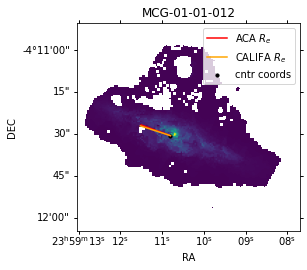

Inclination: 90º, 68.5º


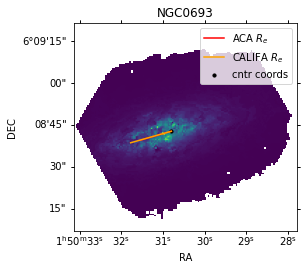

Inclination: 90º, 73.2º


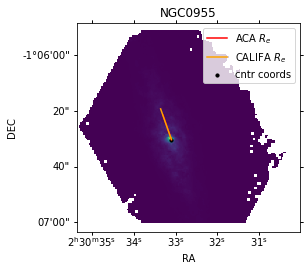

Inclination: 90º, 66.6º


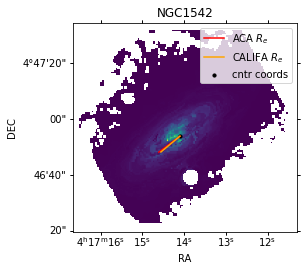

In [269]:
for source in sources[:]:
    inc1 = aca_table.loc[source,'inclination_ACA']
    inc2 = aca_table.loc[source,'inclination_califa']
    if inc1 == 90:
        M_star, califa_hdr = get_data(califaoutpath+source+'_Mstar.fits',header=True)
        w_califa = WCS(califa_hdr)

        PA = np.deg2rad(aca_table.loc[source,'PA_ACA'])
        Re = aca_table.loc[source,'Re_arc_ACA']/3600
        #print(Re)
        #print(f'{Re*np.sin(PA):.3}, {Re*np.cos(PA):.3}')
        coords_world = [[aca_table.loc[source,'RA'],aca_table.loc[source,'DEC']],
                        [aca_table.loc[source,'RA']+Re*np.sin(PA),aca_table.loc[source,'DEC']+Re*np.cos(PA)]]
        coords_pixel1 = w_califa.all_world2pix(coords_world, 0).T
        #print(coords_pixel.shape)

        PA = np.deg2rad(aca_table.loc[source,'PA_califa']-90)
        Re = aca_table.loc[source,'Re_arc_califa']/3600
        coords_world = [[aca_table.loc[source,'RA'],aca_table.loc[source,'DEC']],
                        [aca_table.loc[source,'RA']+Re*np.sin(PA),aca_table.loc[source,'DEC']+Re*np.cos(PA)]]
        coords_pixel2 = w_califa.all_world2pix(coords_world, 0).T

        print(f'Inclination: {inc1}º, {inc2:.3}º')
        fig, ax = plt.subplots(figsize=(4,4),subplot_kw=dict(projection=w_califa))
        ax.imshow(M_star,origin='lower')
        ax.set_title(source)
        ax.scatter(coords_pixel1[0,0],coords_pixel1[1,0],s=10,c='k',label='cntr coords')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
        ax.plot(coords_pixel1[0],coords_pixel1[1],c='r',label='ACA $R_e$')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
        ax.plot(coords_pixel2[0],coords_pixel2[1],c='orange',label='CALIFA $R_e$')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
        ax.legend(loc='best')
        ax.set_xlabel('RA',size=10)
        ax.set_ylabel('DEC',size=10)
        plt.show()
        plt.close()

Inclination: 60º, 60.0º


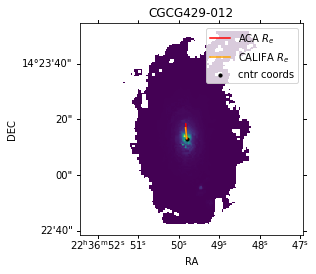

Inclination: 50º, 53.4º


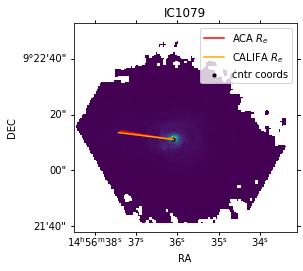

Inclination: 70º, 69.6º


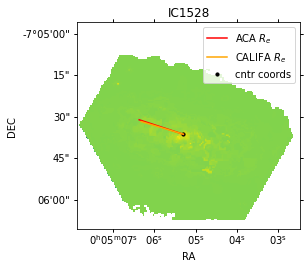

Inclination: 60º, 59.2º


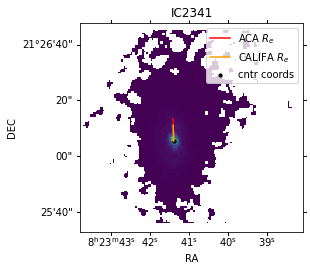

Inclination: 90º, 73.2º


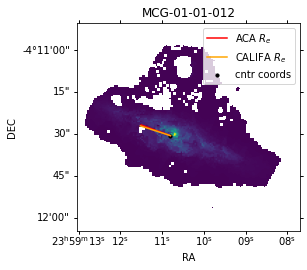

Inclination: 73º, 73.2º


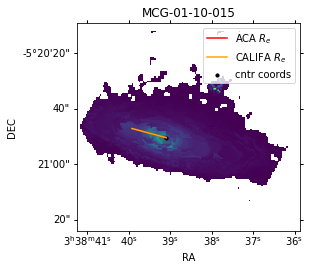

Inclination: 43º, 39.2º


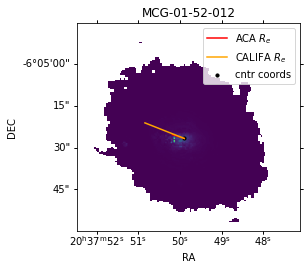

Inclination: 70º, 69.6º


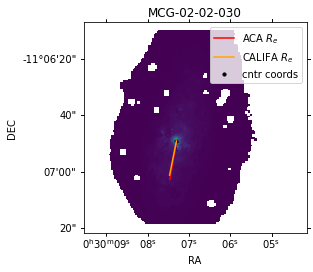

Inclination: 68º, 70.4º


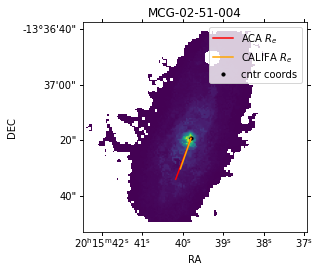

Inclination: 34º, 46.8º


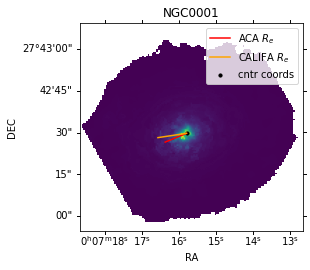

Inclination: 40º, 37.6º


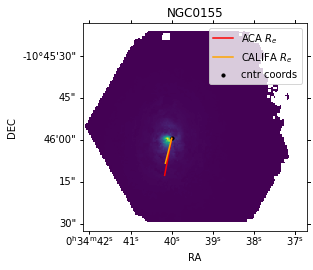

Inclination: 72º, 71.8º


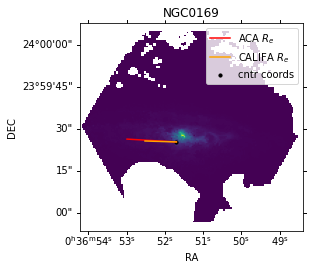

Inclination: 33º, 43.2º


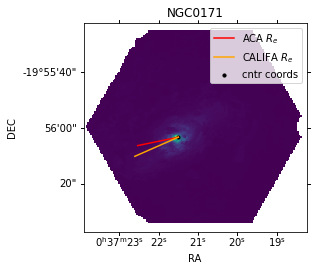

Inclination: 45º, 67.1º


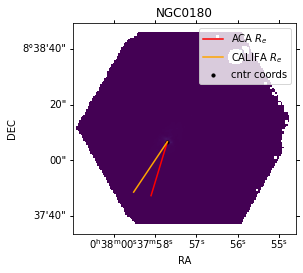

Inclination: 90º, 68.5º


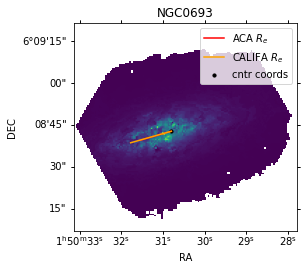

Inclination: 20º, 18.0º


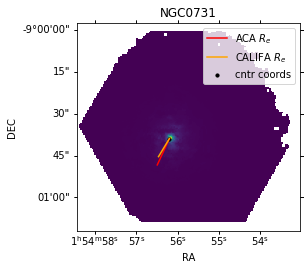

Inclination: 68º, 67.3º


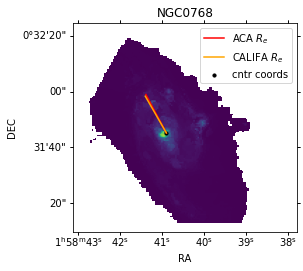

Inclination: 90º, 73.2º


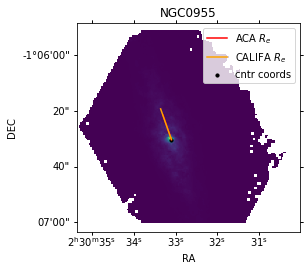

Inclination: 53º, 45.7º


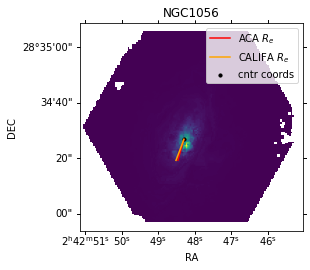

Inclination: 90º, 66.6º


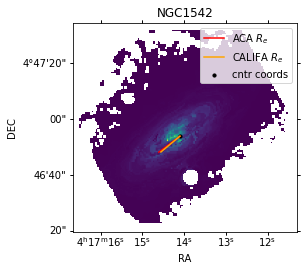

Inclination: 70º, 68.2º


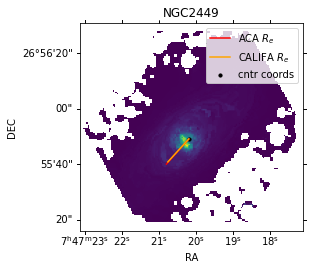

Inclination: 55º, 55.7º


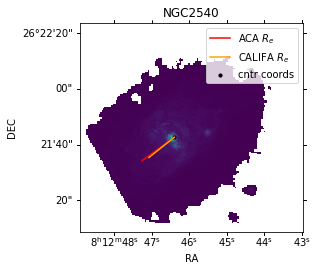

Inclination: 47º, 46.9º


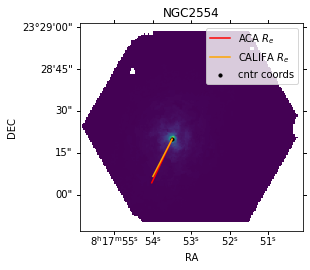

Inclination: 35º, 47.2º


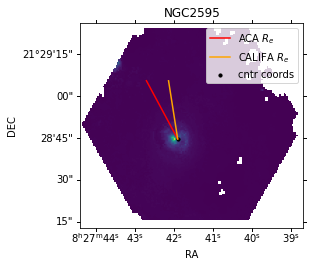

Inclination: 57º, 57.7º


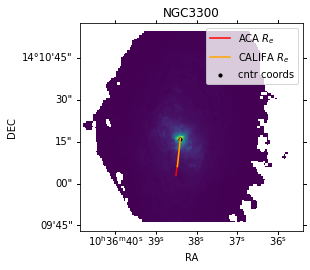

Inclination: 70º, 70.4º


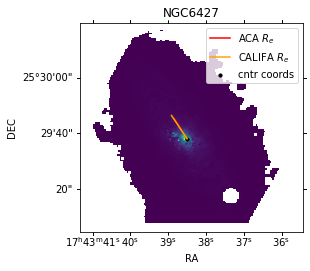

Inclination: 54º, 42.9º


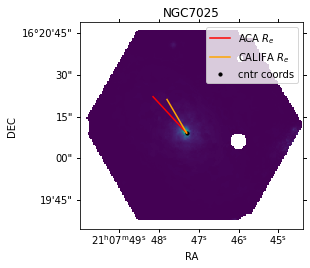

Inclination: 43º, 58.5º


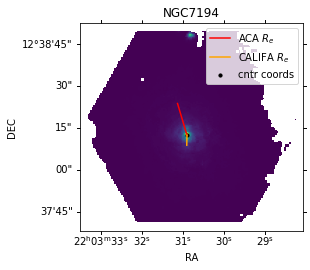

Inclination: 62º, 60.7º


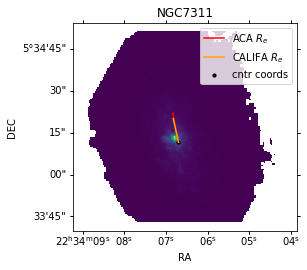

Inclination: 56º, 51.6º


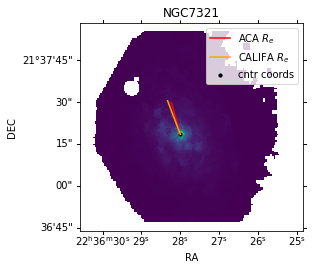

Inclination: 54º, 48.3º


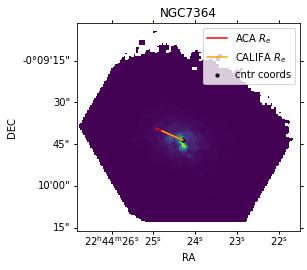

Inclination: 66º, 68.1º


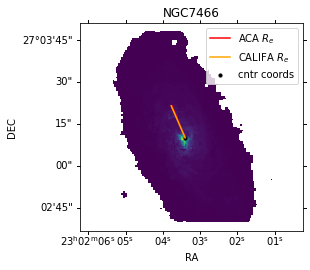

Inclination: 63º, 52.7º


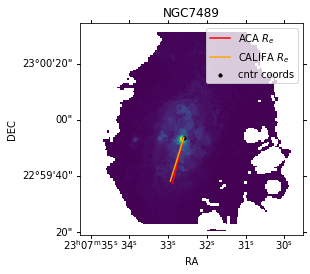

Inclination: 40º, 36.1º


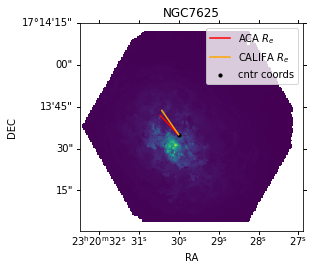

Inclination: 44º, 38.9º


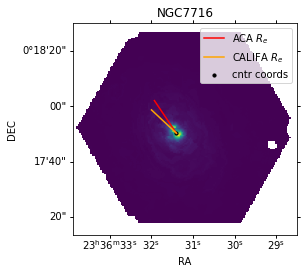

Inclination: 63º, 68.4º


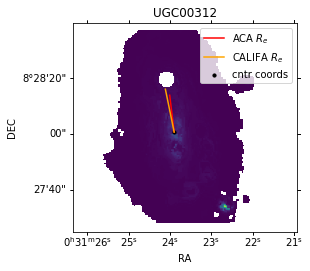

Inclination: 50º, 50.5º


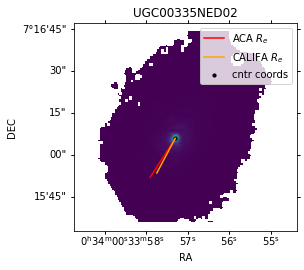

Inclination: 75º, 73.2º


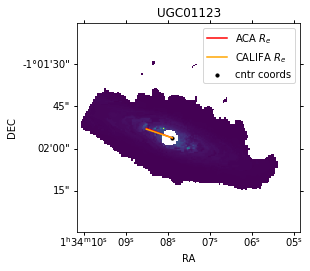

Inclination: 73º, 73.2º


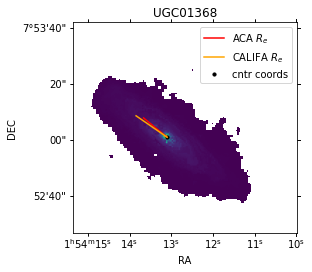

Inclination: 78º, 73.2º


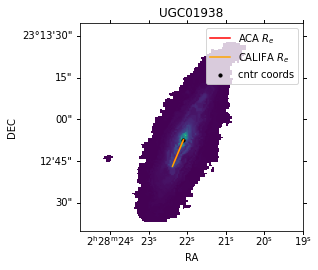

Inclination: 66º, 63.2º


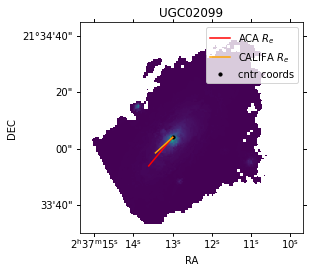

Inclination: 76º, 73.2º


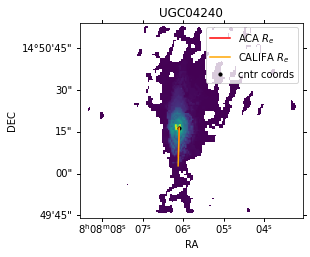

Inclination: 70º, 72.8º


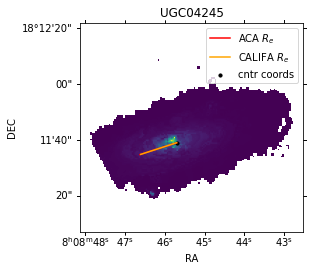

Inclination: 47º, 37.8º


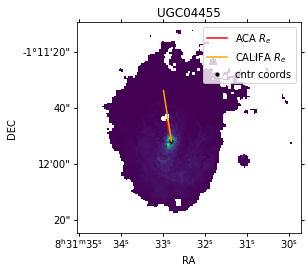

Inclination: 75º, 70.3º


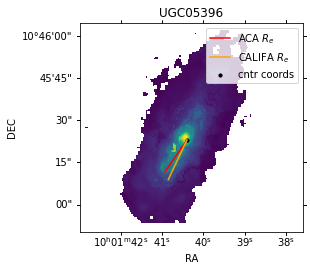

Inclination: 73º, 73.2º


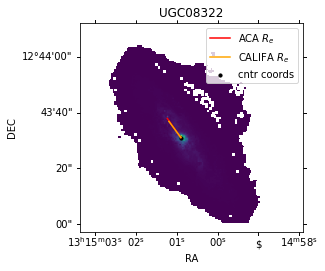

Inclination: 50º, 51.2º


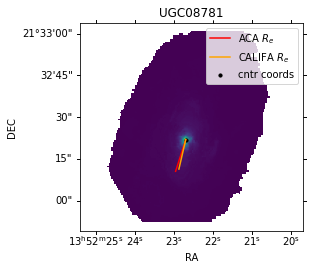

Inclination: 78º, 73.2º


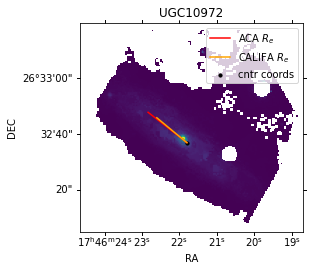

Inclination: 42º, 36.3º


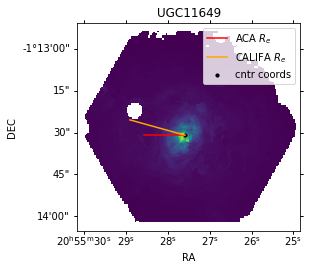

Inclination: 40º, 23.8º


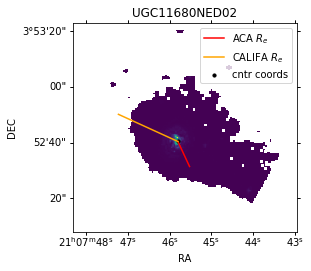

Inclination: 78º, 73.2º


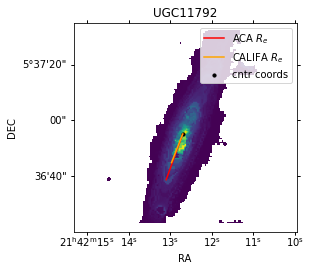

Inclination: 50º, 73.2º


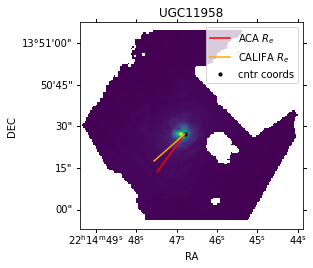

Inclination: 78º, 73.2º


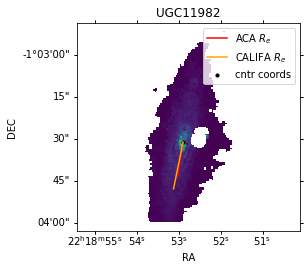

Inclination: 45º, 37.3º


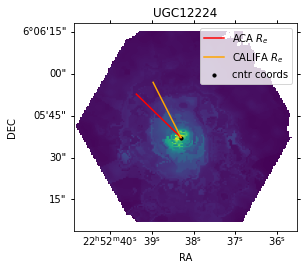

Inclination: 53º, 50.6º


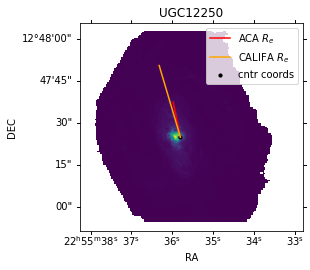

Inclination: 73º, 64.1º


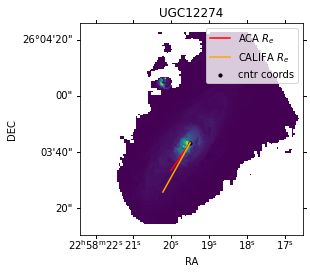

Inclination: 75º, 62.2º


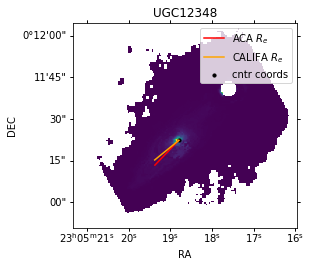

Inclination: 82º, 73.2º


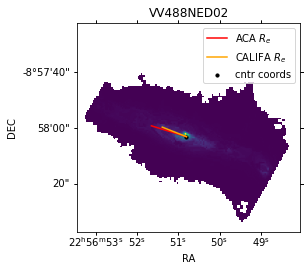

In [263]:
for source in sources[:]:
    M_star, califa_hdr = get_data(califaoutpath+source+'_Mstar.fits',header=True)
    w_califa = WCS(califa_hdr)
    
    PA = np.deg2rad(aca_table.loc[source,'PA_ACA'])
    Re = aca_table.loc[source,'Re_arc_ACA']/3600
    #print(Re)
    #print(f'{Re*np.sin(PA):.3}, {Re*np.cos(PA):.3}')
    coords_world = [[aca_table.loc[source,'RA'],aca_table.loc[source,'DEC']],
                    [aca_table.loc[source,'RA']+Re*np.sin(PA),aca_table.loc[source,'DEC']+Re*np.cos(PA)]]
    coords_pixel1 = w_califa.all_world2pix(coords_world, 0).T
    #print(coords_pixel.shape)
    
    PA = np.deg2rad(aca_table.loc[source,'PA_califa']-90)
    Re = aca_table.loc[source,'Re_arc_califa']/3600
    coords_world = [[aca_table.loc[source,'RA'],aca_table.loc[source,'DEC']],
                    [aca_table.loc[source,'RA']+Re*np.sin(PA),aca_table.loc[source,'DEC']+Re*np.cos(PA)]]
    coords_pixel2 = w_califa.all_world2pix(coords_world, 0).T
    
    inc1 = aca_table.loc[source,'inclination_ACA']
    inc2 = aca_table.loc[source,'inclination_califa']
    
    print(f'Inclination: {inc1}º, {inc2:.3}º')
    fig, ax = plt.subplots(figsize=(4,4),subplot_kw=dict(projection=w_califa))
    ax.imshow(M_star,origin='lower')
    ax.set_title(source)
    ax.scatter(coords_pixel1[0,0],coords_pixel1[1,0],s=10,c='k',label='cntr coords')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
    ax.plot(coords_pixel1[0],coords_pixel1[1],c='r',label='ACA $R_e$')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
    ax.plot(coords_pixel2[0],coords_pixel2[1],c='orange',label='CALIFA $R_e$')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
    ax.legend(loc='best')
    ax.set_xlabel('RA',size=10)
    ax.set_ylabel('DEC',size=10)
    plt.show()
    plt.close()

In [259]:
abs(aca_table['Re_arc_ACA']-aca_table['Re_arc_califa'])/aca_table['Re_arc_ACA']

CGCG429-012      0.260492
IC1079           0.035336
IC1528           0.051421
IC2341           0.296484
MCG-01-01-012    0.018029
MCG-01-10-015    0.087273
MCG-01-52-012    2.382384
MCG-02-02-030    0.107008
MCG-02-51-004    0.262925
NGC0001          0.268460
NGC0155          0.318472
NGC0169          0.364962
NGC0171          0.136433
NGC0180          0.078679
NGC0693          0.313426
NGC0731          0.272180
NGC0768          0.026678
NGC0955          0.241023
NGC1056          0.041717
NGC1542          0.064485
NGC2449          0.073287
NGC2540          0.190818
NGC2554          0.127817
NGC2595          0.122828
NGC3300          0.243862
NGC6427          0.165769
NGC7025          0.221352
NGC7194          0.700453
NGC7311          0.184301
NGC7321          0.083825
NGC7364          0.246951
NGC7466          0.011734
NGC7489          0.022721
NGC7625          0.091818
NGC7716          0.133024
UGC00312         0.179317
UGC00335NED02    0.151307
UGC01123         0.000783
UGC01368    

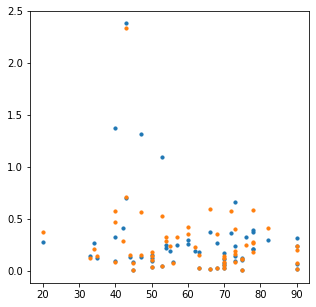

In [261]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(aca_table['inclination_ACA'],abs(aca_table['Re_arc_ACA']-aca_table['Re_arc_califa'])/aca_table['Re_arc_ACA'],s=10)
ax.scatter(aca_table['inclination_ACA'],abs(aca_table['Re_arc_ACA']-aca_table['Re_arc_califa'])/aca_table['Re_arc_califa'],s=10)
plt.show()

In [238]:
abs(aca_table['PA_califa']-aca_table['PA_ACA']-90)%180

CGCG429-012        2.449515
IC1079             1.896524
IC1528             1.338896
IC2341             0.323697
MCG-01-01-012      2.159184
MCG-01-10-015      0.127792
MCG-01-52-012      3.477178
MCG-02-02-030      1.633334
MCG-02-51-004      1.342809
NGC0001           12.419308
NGC0155            3.524524
NGC0169            1.436732
NGC0171           11.472854
NGC0180           17.110102
NGC0693            0.280688
NGC0731            6.409627
NGC0768            1.873679
NGC0955            0.394494
NGC1056            5.110047
NGC1542            2.630750
NGC2449            0.726121
NGC2540            2.590402
NGC2554            2.377933
NGC2595           20.393870
NGC3300            0.881386
NGC6427            1.643522
NGC7025           12.573049
NGC7194          161.580741
NGC7311            1.569152
NGC7321            5.240735
NGC7364            0.059406
NGC7466            1.173714
NGC7489            3.526035
NGC7625            8.986347
NGC7716           12.899524
UGC00312           4

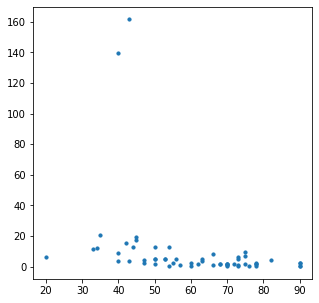

In [254]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(aca_table['inclination_ACA'],abs(aca_table['PA_califa']-aca_table['PA_ACA']-90)%180,s=10)
plt.show()

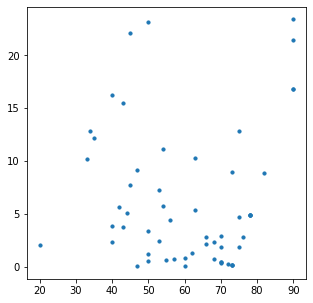

In [252]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(aca_table['inclination_ACA'],abs(aca_table['inclination_ACA']-aca_table['inclination_califa']),s=10)
plt.show()

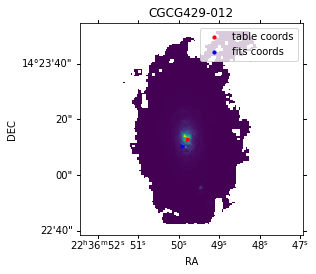

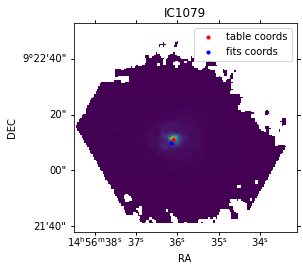

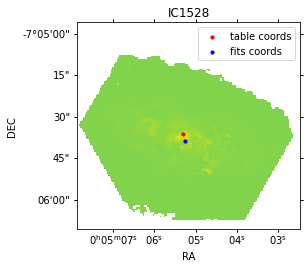

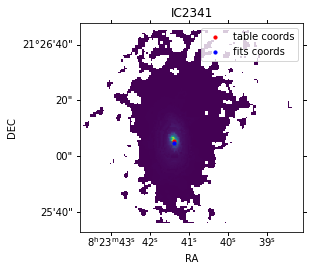

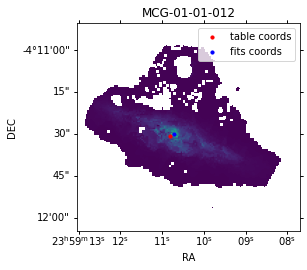

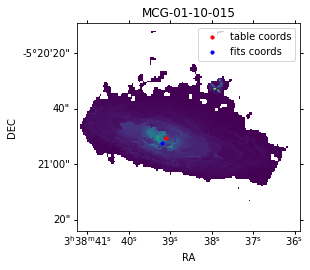

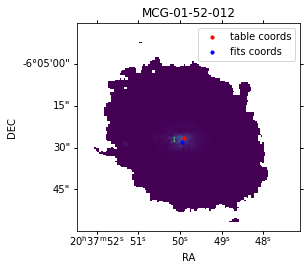

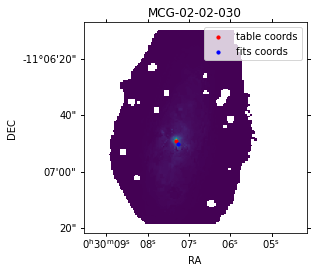

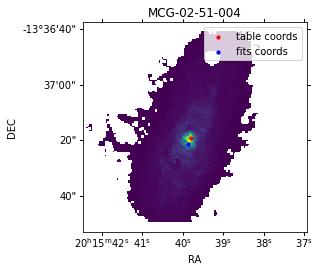

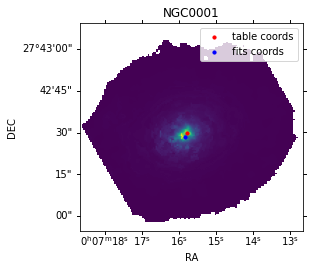

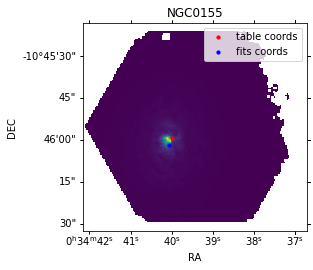

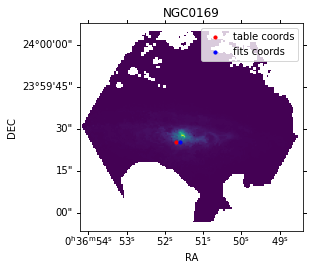

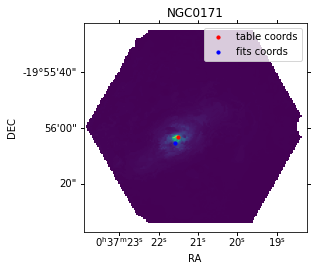

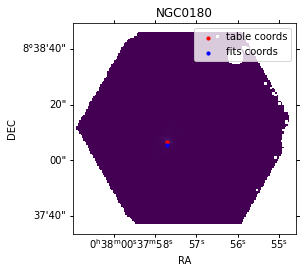

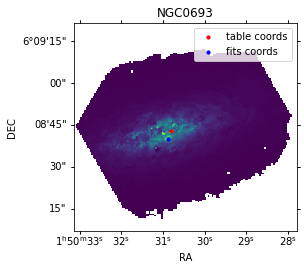

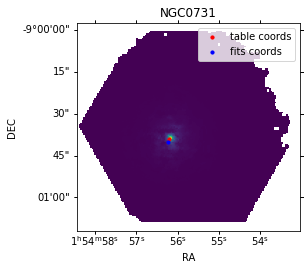

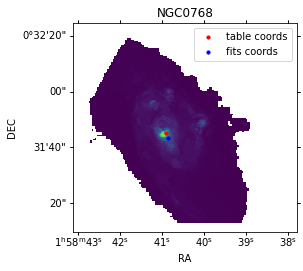

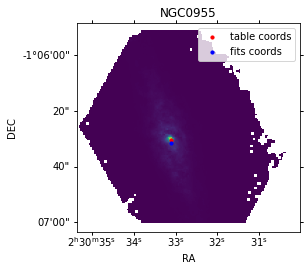

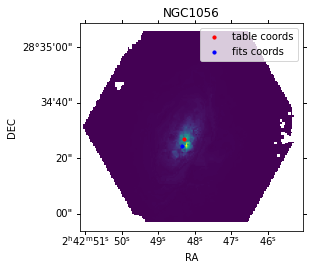

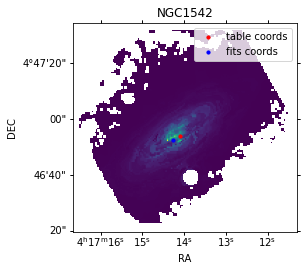

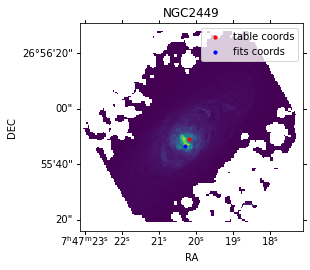

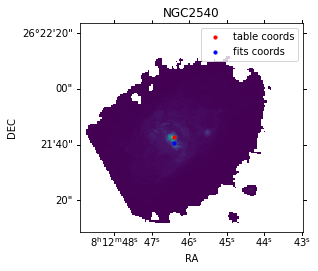

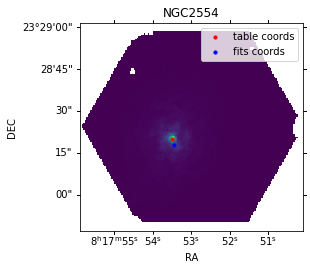

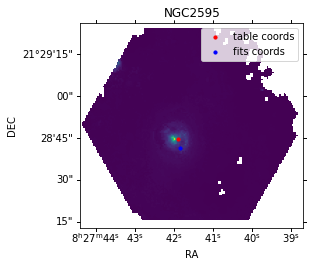

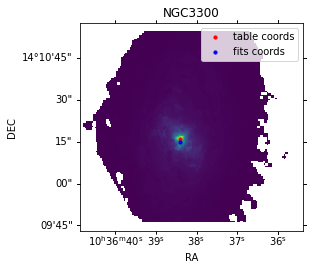

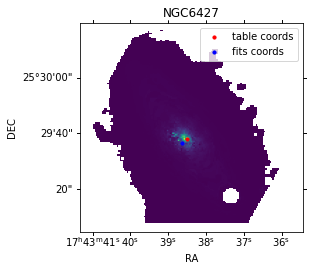

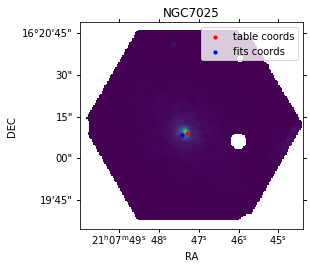

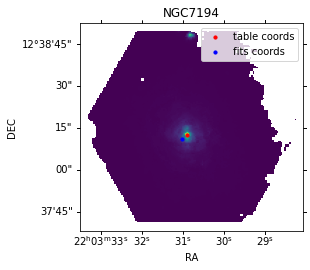

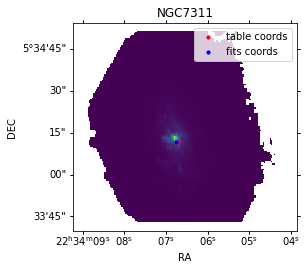

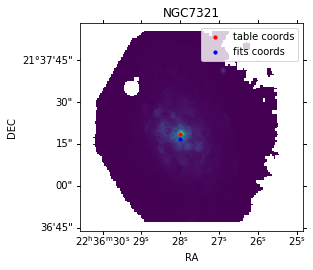

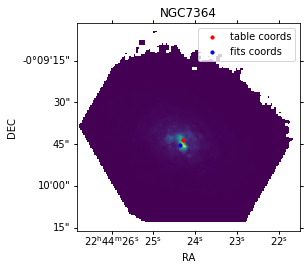

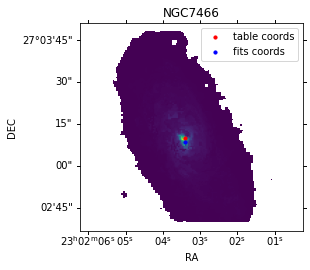

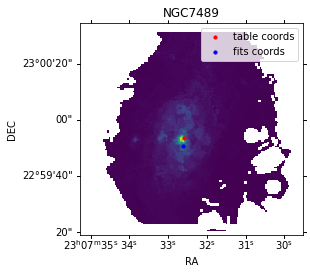

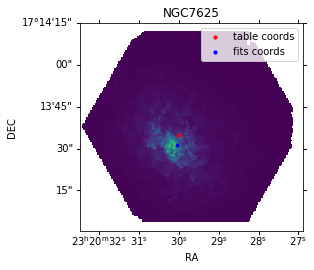

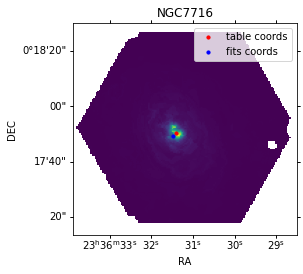

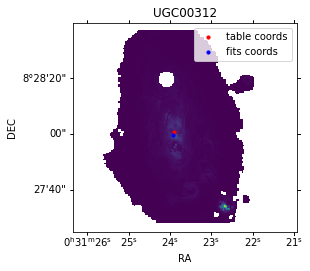

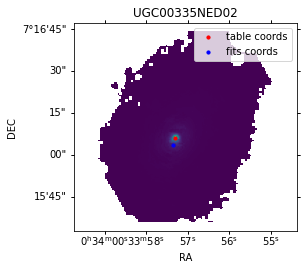

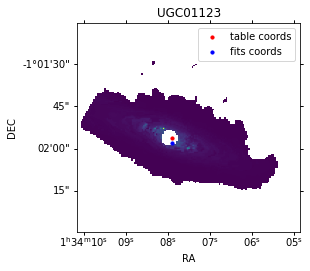

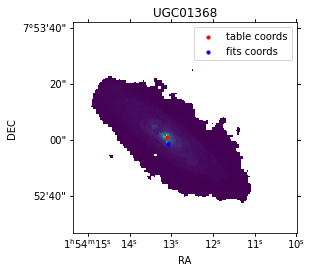

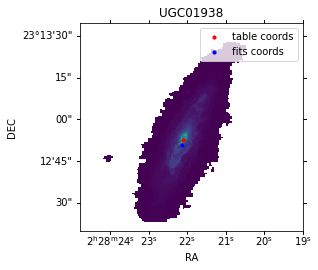

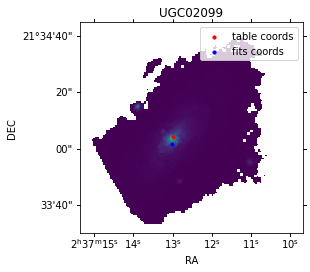

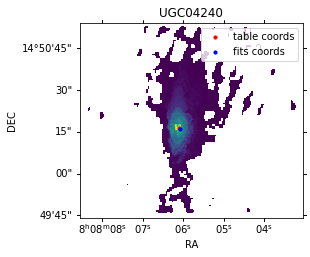

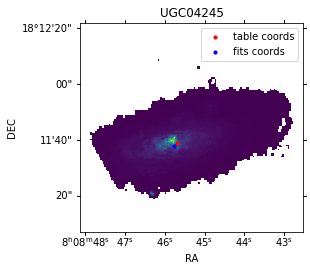

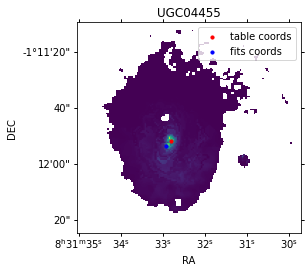

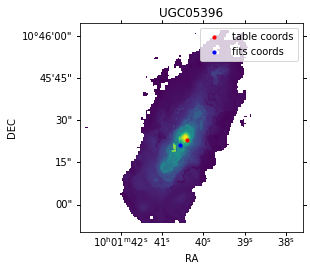

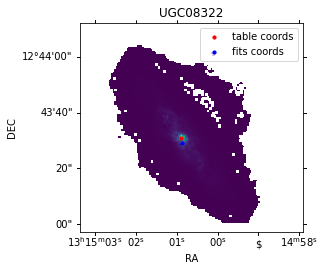

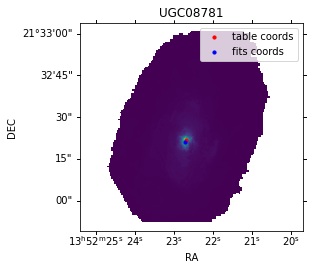

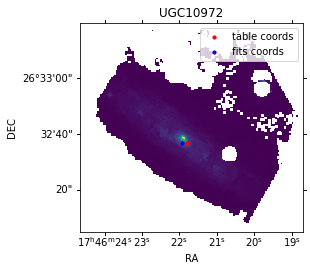

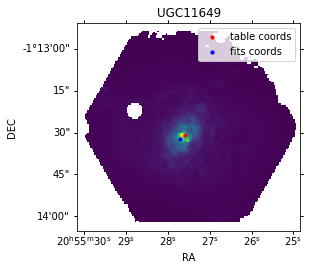

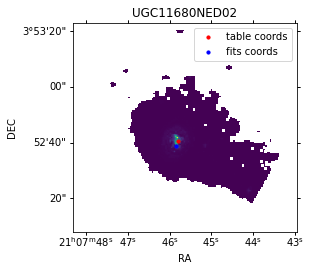

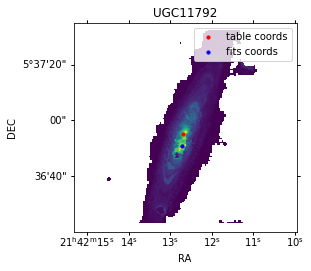

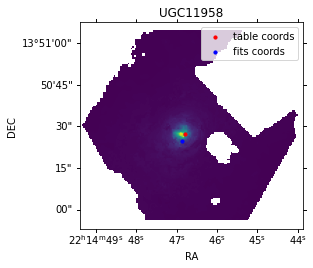

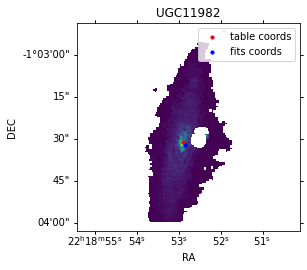

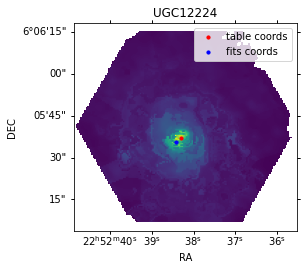

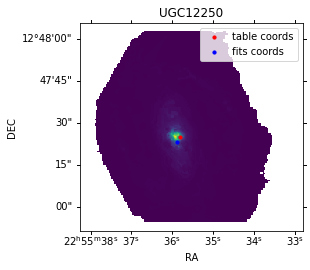

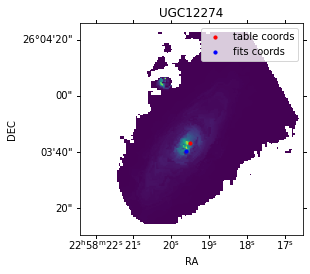

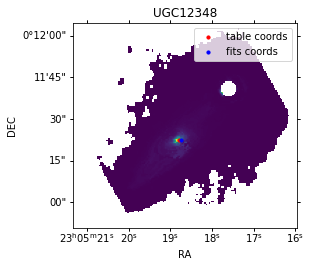

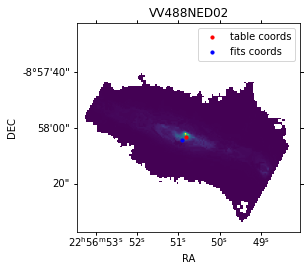

In [195]:
for source in sources[:]:
    M_star, califa_hdr = get_data(califaoutpath+source+'_Mstar.fits',header=True)
    w_califa = WCS(califa_hdr)
    
    coords_world = [[aca_table.loc[source,'RA'],aca_table.loc[source,'DEC']]]
    coords_pixel = w_califa.all_world2pix(coords_world, 0)
    #print(coords_pixel.shape)
    
    fig, ax = plt.subplots(figsize=(4,4),subplot_kw=dict(projection=w_califa))
    ax.imshow(M_star,origin='lower')
    ax.set_title(source)
    ax.scatter(coords_pixel[0,0],coords_pixel[0,1],s=10,c='r',label='table coords')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
    ax.scatter(califa_hdr['CRPIX1'],califa_hdr['CRPIX2'],s=10,c='b',label='fits coords')#f"{coords_world[0][0]:.3},{coords_world[0][1]:.3}")
    ax.legend(loc='best')
    ax.set_xlabel('RA',size=10)
    ax.set_ylabel('DEC',size=10)
    plt.show()
    plt.close()

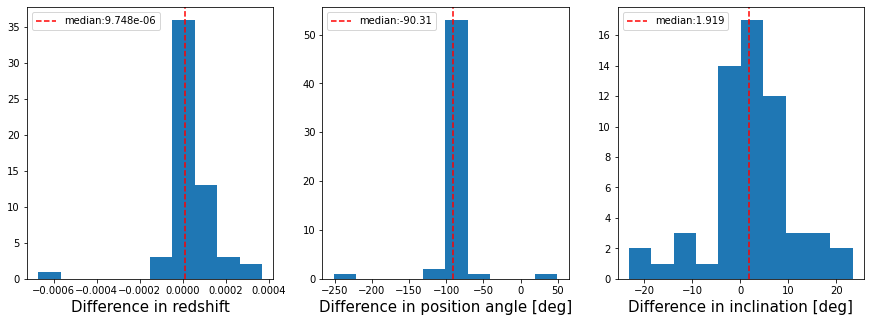

In [101]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for ax,variable,label in zip(axs.ravel(),[aca_table['z']-califa_table['z_stars'],aca_table['PA']-califa_table['P.A.'],aca_table['i']-califa_table['Inclination']],
                                     ['redshift','position angle [deg]','inclination [deg]']):
    ax.hist(variable)
    median = np.median(variable)
    ax.axvline(median,c='r',ls='--',label=f'median:{median:.4}')
    ax.legend(loc='upper left')
    ax.set_xlabel('Difference in '+label,size=15)
plt.show()

In [124]:
aca_table.loc[(aca_table['PA']-califa_table['P.A.']>0)|(aca_table['PA']-califa_table['P.A.']<-200)]

,source,califa_file,Final_QS,Final_NA,RA,DEC,i,PA,z,Dist_Mpc,Re_arcsec
CALIFA_name,,,,,,,,,,,
NGC7194,NGC7194,NGC7194,fR,nonA,330.878750,12.636778,43,17,0.02713,123,11.9
UGC11680NED02,UGC11680NED02,UGC11680NED02,SF,nonA,316.940833,3.877889,40,205,0.02615,111,9.9


In [125]:
califa_table.loc[(aca_table['PA']-califa_table['P.A.']>0)|(aca_table['PA']-califa_table['P.A.']<-200)]

,z_stars,Re_kpc,log_Mass,Re_arc,P.A.,Inclination,log_SFR_SF,Dang,Dlum,Re_rad
name,,,,,,,,,,
NGC7194,0.027022,1.910077,11.347425,3.564612,268.580741,58.513155,-1.651738,112.477543,118.638465,0.000017
UGC11680NED02,0.026145,12.180293,10.896352,23.472792,155.506013,23.791245,0.923609,108.940949,114.711935,0.000114


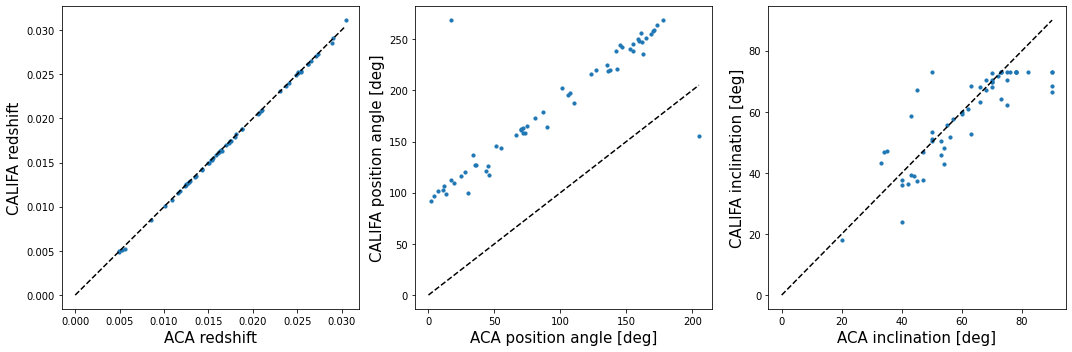

In [132]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for ax,variable1,variable2,label in zip(axs.ravel(),[aca_table['z'],aca_table['PA'],aca_table['i']],[califa_table['z_stars'],califa_table['P.A.'],califa_table['Inclination']],
                                     ['redshift','position angle [deg]','inclination [deg]']):
    ax.scatter(variable1,variable2,s=10)
    ax.plot([0,np.max(variable1)],[0,np.max(variable1)],c='k',ls='--')
    #median = np.median(variable)
    #ax.axvline(median,c='r',ls='--',label=f'median:{median:.4}')
    #ax.legend(loc='upper left')
    ax.set_xlabel('ACA '+label,size=15)
    ax.set_ylabel('CALIFA '+label,size=15)
fig.tight_layout()
plt.show()

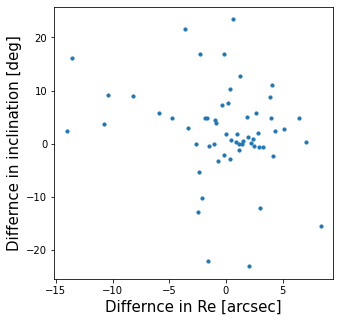

In [140]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(aca_table['Re_arcsec']-califa_table['Re_arc'],aca_table['i']-califa_table['Inclination'],s=10)
ax.set_xlabel('Differnce in Re [arcsec]',size=15)
ax.set_ylabel('Differnce in inclination [deg]',size=15)
plt.show()

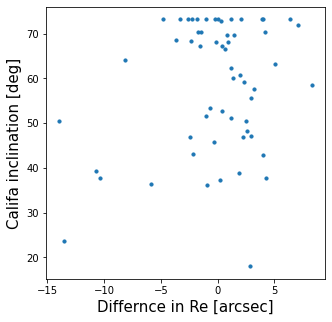

In [137]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(aca_table['Re_arcsec']-califa_table['Re_arc'],califa_table['Inclination'],s=10)
ax.set_xlabel('Differnce in Re [arcsec]',size=15)
ax.set_ylabel('Califa inclination [deg]',size=15)
plt.show()

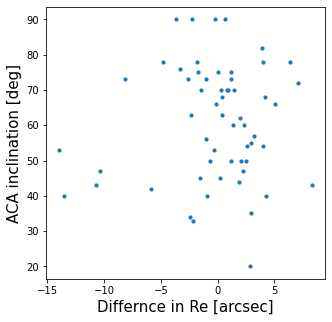

In [139]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(aca_table['Re_arcsec']-califa_table['Re_arc'],aca_table['i'],s=10)
ax.set_xlabel('Differnce in Re [arcsec]',size=15)
ax.set_ylabel('ACA inclination [deg]',size=15)
plt.show()

In [130]:
sortedby_inc = califa_table.sort_values('Inclination',ascending=False).copy()
sortedby_inc[sortedby_inc['Inclination']>70]

,z_stars,Re_kpc,log_Mass,Re_arc,P.A.,Inclination,log_SFR_SF,Dang,Dlum,Re_rad
name,,,,,,,,,,
VV488NED02,0.016322,3.091502,10.638439,9.423000,158.756316,73.160751,0.291203,68.819907,71.084731,0.000046
UGC11958,0.026166,7.754829,11.245256,14.936076,220.452247,73.160751,-0.964983,109.026157,114.806381,0.000072
UGC01123,0.016166,3.172096,10.788709,9.792324,161.391866,73.160751,-0.845247,68.175305,70.397310,0.000047
UGC01368,0.026520,7.104443,10.987677,13.502016,145.660372,73.160751,0.237308,110.453365,116.389475,0.000065
UGC01938,0.020966,4.365385,10.688243,10.425168,245.587864,73.160751,0.411446,87.906847,91.631538,0.000051
UGC04240,0.028491,7.625455,10.838678,13.515408,268.303386,73.160751,-0.142108,118.381269,125.222925,0.000066
UGC08322,0.025239,3.666732,11.189274,7.310016,127.076762,73.160751,-0.132503,105.279026,110.660278,0.000035
NGC0955,0.004882,1.153294,10.168677,11.665620,109.394494,73.160751,-1.248274,20.872665,21.076956,0.000057
UGC11792,0.015867,3.493872,10.601915,10.988352,248.478666,73.160751,0.110669,66.938311,69.079320,0.000053


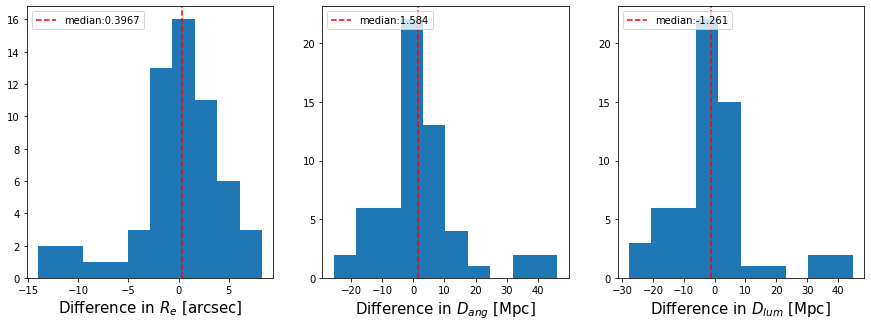

In [111]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for ax,variable,label in zip(axs.ravel(),[aca_table['Re_arcsec']-califa_table['Re_arc'],aca_table['Dist_Mpc']-califa_table['Dang'],aca_table['Dist_Mpc']-califa_table['Dlum']],
                                     ['$R_e$ [arcsec]','$D_{ang}$ [Mpc]','$D_{lum}$ [Mpc]']):
    ax.hist(variable)
    median = np.median(variable)
    ax.axvline(median,c='r',ls='--',label=f'median:{median:.4}')
    ax.legend(loc='upper left')
    ax.set_xlabel('Difference in '+label,size=15)
plt.show()

In [112]:
califa_table['Re_rad'] = np.deg2rad(califa_table['Re_arc']/3600)

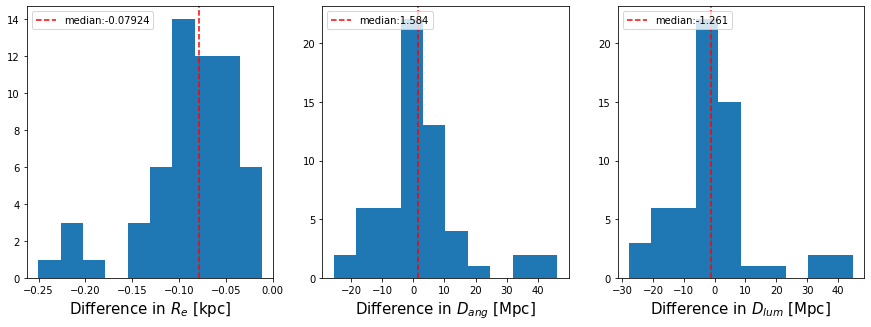

In [131]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for ax,variable,label in zip(axs.ravel(),[califa_table['Re_kpc']-califa_table['Re_rad']*califa_table['Dang']*1000,aca_table['Dist_Mpc']-califa_table['Dang'],aca_table['Dist_Mpc']-califa_table['Dlum']],
                                     ['$R_e$ [kpc]','$D_{ang}$ [Mpc]','$D_{lum}$ [Mpc]']):
    ax.hist(variable)
    median = np.median(variable)
    ax.axvline(median,c='r',ls='--',label=f'median:{median:.4}')
    ax.legend(loc='upper left')
    ax.set_xlabel('Difference in '+label,size=15)
plt.show()

In [53]:
for ia, ib in zip(aca_table['i'],califa_table['Inclination']):
    print(ia,ib)

60 59.9918839099128
50 53.3686358876971
70 69.6183380700142
60 59.2100442523581
90 73.1607510563012
73 73.1607510563012
43 39.2469074573178
70 69.5924638050687
68 70.3601503877133
34 46.8054741770051
40 37.6465446829603
72 71.7897985208354
33 43.202790425671
45 67.1036689815592
90 68.4991374873024
20 18.0007421056796
68 67.2926030950021
90 73.1607510563012
53 45.7359663856354
90 66.5892688053654
70 68.1716128849266
55 55.6534033166989
47 46.9081003410761
35 47.1732528274994
57 57.6928126369247
70 70.4442822983439
54 42.8910537852152
43 58.5131547458459
62 60.7479898389287
56 51.5883573113904
54 48.2975686880007
66 68.098774358668
63 52.7382256988455
40 36.1198397703381
44 38.9038957139494
63 68.377703589315
50 50.5348151385308
75 73.1607510563012
73 73.1607510563012
78 73.1607510563012
66 63.2133677530746
76 73.1607510563012
70 72.8468671019478
47 37.8183612151641
75 70.2662532623207
73 73.1607510563012
50 51.1809052999783
78 73.1607510563012
42 36.3265636005758
40 23.7912452244358
78 

# Create ACA FITS files for all sources in list

In [ ]:
aca_table = pd.read_csv('/users/brodriguez/Documents/ACA_sourcelist.csv',sep=',',index_col=0)

In [97]:
sources = aca_table[aca_table['califa_file']!='---'].index.to_numpy()

In [98]:
aca_table = aca_table.loc[sources]

In [49]:
califa_table = pd.read_csv('/users/brodriguez/Documents/get_proc_elines_CALIFA_2022.csv',sep=',',skiprows=587,index_col=0,
                    usecols=['name','z_stars','log_Mass','log_SFR_SF','Re_arc','Re_kpc','Inclination','P.A.'])#'log_Mass_no_corr','log_Mass_corr','lSFR','z_gas','log_SFR_ssp','DL','DA','P.A.','log_Mass_gas','log_Mass_gas_Re'])
califa_table = califa_table.loc[sources]

In [83]:
for source in sources[:]:
    cube_path = acainpath+source+'_7m_co21_pbcor.fits'
    reduced_path    = acaoutpath+source+'_reduced.fits'
    mask_path       = acaoutpath+source+'_smoothmask.fits'
    integrated_path = acaoutpath+source+'_integrated.fits'

    CO_cube = SpectralCube.read(cube_path)
    CO_cube = CO_cube.minimal_subcube()
    if CO_cube.unit == 'Jy/beam':
        CO_cube = CO_cube.to(u.K)
    if CO_cube.header['CUNIT3'] == 'm/s':
        CO_cube = CO_cube.with_spectral_unit(u.km/u.s)
    CO_cube.write(reduced_path, format='fits',overwrite=True)
    hdu = fits.open(reduced_path)
    data = hdu[0].data
    header = hdu[0].header
    del header['TIMESYS']# = 'utc'
    hdu.close()
    fits.writeto(reduced_path,data,header,overwrite=True)

    # convolving cube to larger resolution for creation of smoothed mask
    beam_6 = radio_beam.Beam(major=6*u.arcsec, minor=6*u.arcsec, pa=0*u.deg)
    beam_9 = radio_beam.Beam(major=9*u.arcsec, minor=9*u.arcsec, pa=0*u.deg)
    CO_cube_smooth = CO_cube.with_beam(beam_6)
    CO_cube_smooth = CO_cube_smooth.convolve_to(beam_9)
    # creating RMS map using free_channels ON EITHER SIDE of the cube:
    free_channels = 10
    CO_RMS_smooth = np.concatenate((CO_cube_smooth.unmasked_data[:free_channels,:,:].value,CO_cube_smooth.unmasked_data[-free_channels:,:,:].value))
    CO_RMS_smooth = np.sqrt(np.mean(np.square(CO_RMS_smooth),axis=0))
    # creating SNR cube:
    SNR_cube_smooth = CO_cube_smooth.unmasked_data[:].value
    SNR_cube_smooth = SNR_cube_smooth/np.broadcast_to(CO_RMS_smooth,SNR_cube_smooth.shape)
    # finding regions of low and high SNR:
    high_SNR_mask_smooth = SNR_cube_smooth>4 # 3.5
    low_SNR_mask_smooth = SNR_cube_smooth>2
    labeled_mask_high_smooth, num_high = ndimage.label(high_SNR_mask_smooth)
    print("Number of high SNR features found: ",num_high)
    labeled_mask_low_smooth, num_low = ndimage.label(low_SNR_mask_smooth)
    print("Number of low SNR features found: ",num_low)
    # ensuring high SNR regions span at least 2 adjacent channels:
    for i, region in enumerate(ndimage.find_objects(labeled_mask_high_smooth)):
        probe = np.where(labeled_mask_high_smooth[region]==i+1,high_SNR_mask_smooth[region],0)
        if (np.sum(probe,axis=0)<2).all():
            high_SNR_mask_smooth[labeled_mask_high_smooth==i+1] = 0
    labeled_mask_high_smooth, num_high = ndimage.label(high_SNR_mask_smooth)
    print("Number of high SNR features left: ",num_high)
    # creating smooth mask from dilated regions of high SNR:
    smooth_mask = np.isin(labeled_mask_low_smooth,labeled_mask_low_smooth[high_SNR_mask_smooth])
    smooth_mask = ndimage.binary_dilation(smooth_mask,iterations=2)
    # requiring non-negative fluxes in unmasked pixels:
    smooth_mask = np.where((CO_cube.unmasked_data[:].value>=0)&np.isfinite(CO_cube.unmasked_data[:].value),smooth_mask,0)
    # saving mask as fits file with WCS in header:
    mask_header = WCS(CO_cube.header).to_header()
    mask_header['OBJECT'] = source
    mask_header['TELESCOP'] = 'ALMA'
    fits.writeto(mask_path,data=smooth_mask&1,header=mask_header,overwrite=True)

    # using smooth mask to generate 0th moment map (integrated intensity)
    CO_cube_masked_smooth = CO_cube.with_mask(smooth_mask)
    mom0_smooth = CO_cube_masked_smooth.moment(order=0)
    # saving integrated intensity map as fits file with corresponding header:
    fits.writeto(integrated_path,data=mom0_smooth.value,header=mom0_smooth.header,overwrite=True)

    # defining pyBBarolo instance with reduced cube and smoothed mask, requesting velocity and velocity dispersion maps
    bb = BBaroloWrapper(fitsfile=reduced_path,mask='file('+mask_path+')',dispersionmap=True,velocitymap=True,outfolder=acaoutpath,verbose=False)
    bb.run()
    print('Finished creating ACA files for source ',source)

Number of high SNR features found:  217
Number of low SNR features found:  2542
Number of high SNR features left:  14
Spectral axis is VELOCITY.
  Channel width   = -5.081373 km/s = -5.081373 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.460031e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.677935" x 5.295903" (angle = -36.326548 deg).
Beam area is 25.810986 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/CGCG429-012_smoothmask.fits
Reading 67 x 75 x 293 pixels FITS file (5.6 MB)... Done. 

Finished creating ACA files for source  CGCG429-012


Number of high SNR features found:  74
Number of low SNR features found:  1648
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = 5.081452 km/s = 5.081452 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.052144e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 7.709238" x 6.327773" (angle = -82.896291 deg).
Beam area is 24.566553 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/IC1079_smoothmask.fits
Reading 74 x 74 x 140 pixels FITS file (2.9 MB)... Done. 

Finished creating ACA files for source  IC1079


Number of high SNR features found:  103
Number of low SNR features found:  2076
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = -5.081203 km/s = -5.081203 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.220550e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.200592" x 4.595516" (angle = -76.926701 deg).
Beam area is 42.701580 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/IC1528_smoothmask.fits
Reading 104 x 111 x 196 pixels FITS file (8.6 MB)... Done. 

Finished creating ACA files for source  IC1528


Number of high SNR features found:  133
Number of low SNR features found:  2151
Number of high SNR features left:  3
Spectral axis is VELOCITY.
  Channel width   = -5.081064 km/s = -5.081064 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.152948e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 8.003877" x 6.171136" (angle = -72.024667 deg).
Beam area is 35.818699 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/IC2341_smoothmask.fits
Reading 90 x 85 x 176 pixels FITS file (5.1 MB)... Done. 

Finished creating ACA files for source  IC2341


Number of high SNR features found:  110
Number of low SNR features found:  1946
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = 5.081219 km/s = 5.081219 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 5.887403e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.094542" x 4.406383" (angle = 88.571225 deg).
Beam area is 40.414658 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/MCG-01-01-012_smoothmask.fits
Reading 99 x 110 x 196 pixels FITS file (8.1 MB)... Done. 

Finished creating ACA files for source  MCG-01-01-012


Number of high SNR features found:  54
Number of low SNR features found:  1749
Number of high SNR features left:  3
Spectral axis is VELOCITY.
  Channel width   = -5.080974 km/s = -5.080974 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.982028e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.255281" x 5.123898" (angle = -47.865525 deg).
Beam area is 21.301699 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/MCG-01-10-015_smoothmask.fits
Reading 69 x 75 x 196 pixels FITS file (3.9 MB)... Done. 

Finished creating ACA files for source  MCG-01-10-015


Number of high SNR features found:  90
Number of low SNR features found:  2022
Number of high SNR features left:  4
Spectral axis is VELOCITY.
  Channel width   = -5.081436 km/s = -5.081436 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.948429e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.377492" x 5.024854" (angle = -45.421384 deg).
Beam area is 21.199192 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/MCG-01-52-012_smoothmask.fits
Reading 70 x 74 x 195 pixels FITS file (3.9 MB)... Done. 

Finished creating ACA files for source  MCG-01-52-012


Number of high SNR features found:  459
Number of low SNR features found:  2990
Number of high SNR features left:  27
Spectral axis is VELOCITY.
  Channel width   = -5.081160 km/s = -5.081160 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.000771e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.253510" x 4.404728" (angle = -75.997610 deg).
Beam area is 41.192886 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/MCG-02-02-030_smoothmask.fits
Reading 103 x 112 x 275 pixels FITS file (12.1 MB)... Done. 

Finished creating ACA files for source  MCG-02-02-030


Number of high SNR features found:  106
Number of low SNR features found:  1918
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = 5.081425 km/s = 5.081425 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.894458e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.083619" x 5.167078" (angle = -42.778592 deg).
Beam area is 21.034527 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/MCG-02-51-004_smoothmask.fits
Reading 65 x 74 x 196 pixels FITS file (3.6 MB)... Done. 

Finished creating ACA files for source  MCG-02-51-004


Number of high SNR features found:  93
Number of low SNR features found:  1560
Number of high SNR features left:  12
Spectral axis is VELOCITY.
  Channel width   = -5.081301 km/s = -5.081301 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 9.494138e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 11.721971" x 4.906883" (angle = -23.644355 deg).
Beam area is 28.965977 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0001_smoothmask.fits
Reading 74 x 70 x 196 pixels FITS file (3.9 MB)... Done. 

Finished creating ACA files for source  NGC0001


Number of high SNR features found:  108
Number of low SNR features found:  2379
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = 5.081155 km/s = 5.081155 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.671747e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 7.890612" x 5.122473" (angle = -46.958579 deg).
Beam area is 20.355055 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0155_smoothmask.fits
Reading 72 x 75 x 196 pixels FITS file (4.0 MB)... Done. 

Finished creating ACA files for source  NGC0155


Number of high SNR features found:  139
Number of low SNR features found:  1591
Number of high SNR features left:  9
Spectral axis is VELOCITY.
  Channel width   = -5.081256 km/s = -5.081256 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.252898e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 10.080846" x 4.959756" (angle = -30.701045 deg).
Beam area is 25.179039 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0169_smoothmask.fits
Reading 66 x 74 x 196 pixels FITS file (3.7 MB)... Done. 

Finished creating ACA files for source  NGC0169


Number of high SNR features found:  145
Number of low SNR features found:  1978
Number of high SNR features left:  7
Spectral axis is VELOCITY.
  Channel width   = -5.081128 km/s = -5.081128 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.454861e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.017344" x 4.877611" (angle = -47.080435 deg).
Beam area is 19.693348 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0171_smoothmask.fits
Reading 73 x 64 x 197 pixels FITS file (3.5 MB)... Done. 

Finished creating ACA files for source  NGC0171


Number of high SNR features found:  191
Number of low SNR features found:  2252
Number of high SNR features left:  11
Spectral axis is VELOCITY.
  Channel width   = -5.081208 km/s = -5.081208 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.156972e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.903947" x 5.550054" (angle = -29.760705 deg).
Beam area is 24.886375 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0180_smoothmask.fits
Reading 63 x 72 x 290 pixels FITS file (5.0 MB)... Done. 

Finished creating ACA files for source  NGC0180


Number of high SNR features found:  115
Number of low SNR features found:  2520
Number of high SNR features left:  3
Spectral axis is VELOCITY.
  Channel width   = -5.081113 km/s = -5.081113 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.476122e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.902466" x 5.087645" (angle = -42.947405 deg).
Beam area is 22.809147 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0693_smoothmask.fits
Reading 81 x 82 x 195 pixels FITS file (4.9 MB)... Done. 

Finished creating ACA files for source  NGC0693


Number of high SNR features found:  69
Number of low SNR features found:  1839
Number of high SNR features left:  0
Spectral axis is VELOCITY.
  Channel width   = -5.081064 km/s = -5.081064 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.868252e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.182658" x 5.085137" (angle = -49.265873 deg).
Beam area is 20.954576 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0731_smoothmask.fits
Reading 72 x 62 x 196 pixels FITS file (3.3 MB)... Done. 

Finished creating ACA files for source  NGC0731


Number of high SNR features found:  65
Number of low SNR features found:  1006
Number of high SNR features left:  9
Spectral axis is VELOCITY.
  Channel width   = 5.081086 km/s = 5.081086 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.300782e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.340220" x 5.303256" (angle = -46.463410 deg).
Beam area is 22.274195 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0768_smoothmask.fits
Reading 74 x 67 x 121 pixels FITS file (2.3 MB)... Done. 

Finished creating ACA files for source  NGC0768


Number of high SNR features found:  108
Number of low SNR features found:  2264
Number of high SNR features left:  10
Spectral axis is VELOCITY.
  Channel width   = -5.081047 km/s = -5.081047 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.331951e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.521581" x 5.212549" (angle = -43.802365 deg).
Beam area is 22.369291 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC0955_smoothmask.fits
Reading 80 x 81 x 196 pixels FITS file (4.8 MB)... Done. 

Finished creating ACA files for source  NGC0955


Number of high SNR features found:  98
Number of low SNR features found:  2340
Number of high SNR features left:  6
Spectral axis is VELOCITY.
  Channel width   = -5.081142 km/s = -5.081142 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.694061e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 10.884707" x 4.839012" (angle = -27.329826 deg).
Beam area is 26.524996 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC1056_smoothmask.fits
Reading 81 x 80 x 195 pixels FITS file (4.8 MB)... Done. 

Finished creating ACA files for source  NGC1056


Number of high SNR features found:  148
Number of low SNR features found:  2122
Number of high SNR features left:  7
Spectral axis is VELOCITY.
  Channel width   = -5.080978 km/s = -5.080978 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.459750e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.183751" x 4.782049" (angle = -42.279452 deg).
Beam area is 19.708261 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC1542_smoothmask.fits
Reading 71 x 60 x 196 pixels FITS file (3.2 MB)... Done. 

Finished creating ACA files for source  NGC1542


Number of high SNR features found:  166
Number of low SNR features found:  2257
Number of high SNR features left:  12
Spectral axis is VELOCITY.
  Channel width   = -5.081067 km/s = -5.081067 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.503055e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 7.612595" x 5.971125" (angle = -76.357645 deg).
Beam area is 51.505466 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC2449_smoothmask.fits
Reading 105 x 112 x 196 pixels FITS file (8.8 MB)... Done. 

Finished creating ACA files for source  NGC2449


Number of high SNR features found:  76
Number of low SNR features found:  1500
Number of high SNR features left:  1
Spectral axis is VELOCITY.
  Channel width   = 5.081078 km/s = 5.081078 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 9.089903e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.673236" x 5.692961" (angle = -20.731397 deg).
Beam area is 27.732685 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC2540_smoothmask.fits
Reading 61 x 71 x 196 pixels FITS file (3.2 MB)... Done. 

Finished creating ACA files for source  NGC2540


Number of high SNR features found:  69
Number of low SNR features found:  1621
Number of high SNR features left:  4
Spectral axis is VELOCITY.
  Channel width   = -5.081069 km/s = -5.081069 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.116736e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 8.276318" x 5.941485" (angle = -60.518943 deg).
Beam area is 35.659607 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC2554_smoothmask.fits
Reading 76 x 88 x 197 pixels FITS file (5.0 MB)... Done. 

Finished creating ACA files for source  NGC2554


Number of high SNR features found:  80
Number of low SNR features found:  1427
Number of high SNR features left:  10
Spectral axis is VELOCITY.
  Channel width   = -5.081067 km/s = -5.081067 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.033310e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 8.458299" x 5.753900" (angle = -63.186161 deg).
Beam area is 35.293095 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC2595_smoothmask.fits
Reading 87 x 77 x 195 pixels FITS file (5.0 MB)... Done. 

Finished creating ACA files for source  NGC2595


Number of high SNR features found:  137
Number of low SNR features found:  3029
Number of high SNR features left:  1
Spectral axis is VELOCITY.
  Channel width   = -5.081162 km/s = -5.081162 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.341880e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 7.662325" x 5.804937" (angle = -75.623275 deg).
Beam area is 50.399063 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC3300_smoothmask.fits
Reading 124 x 124 x 153 pixels FITS file (9.0 MB)... Done. 

Finished creating ACA files for source  NGC3300


Number of high SNR features found:  145
Number of low SNR features found:  1854
Number of high SNR features left:  3
Spectral axis is VELOCITY.
  Channel width   = -5.081563 km/s = -5.081563 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.402318e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 10.297140" x 4.943486" (angle = -29.081251 deg).
Beam area is 25.634909 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC6427_smoothmask.fits
Reading 72 x 61 x 216 pixels FITS file (3.6 MB)... Done. 

Finished creating ACA files for source  NGC6427


Number of high SNR features found:  176
Number of low SNR features found:  2487
Number of high SNR features left:  9
Spectral axis is VELOCITY.
  Channel width   = -5.081469 km/s = -5.081469 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.350577e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 9.124782" x 4.880336" (angle = -49.402376 deg).
Beam area is 32.293606 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7025_smoothmask.fits
Reading 86 x 89 x 197 pixels FITS file (5.8 MB)... Done. 

Finished creating ACA files for source  NGC7025


Number of high SNR features found:  122
Number of low SNR features found:  2193
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = 5.081406 km/s = 5.081406 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.709839e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.467720" x 5.573339" (angle = -30.350169 deg).
Beam area is 26.573133 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7194_smoothmask.fits
Reading 73 x 74 x 197 pixels FITS file (4.1 MB)... Done. 

Finished creating ACA files for source  NGC7194


Number of high SNR features found:  77
Number of low SNR features found:  1436
Number of high SNR features left:  7
Spectral axis is VELOCITY.
  Channel width   = -5.081354 km/s = -5.081354 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.518837e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.925820" x 5.103326" (angle = -40.911726 deg).
Beam area is 22.939466 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7311_smoothmask.fits
Reading 74 x 68 x 197 pixels FITS file (3.8 MB)... Done. 

Finished creating ACA files for source  NGC7311


Number of high SNR features found:  37
Number of low SNR features found:  731
Number of high SNR features left:  4
Spectral axis is VELOCITY.
  Channel width   = 5.081390 km/s = 5.081390 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.878886e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.716552" x 4.912509" (angle = -30.008741 deg).
Beam area is 24.037954 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7321_smoothmask.fits
Reading 62 x 72 x 89 pixels FITS file (1.5 MB)... Done. 

Finished creating ACA files for source  NGC7321


Number of high SNR features found:  127
Number of low SNR features found:  2024
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = -5.081325 km/s = -5.081325 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.261919e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.359951" x 4.537895" (angle = 86.142130 deg).
Beam area is 42.985558 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7364_smoothmask.fits
Reading 103 x 112 x 197 pixels FITS file (8.7 MB)... Done. 

Finished creating ACA files for source  NGC7364


Number of high SNR features found:  138
Number of low SNR features found:  1810
Number of high SNR features left:  7
Spectral axis is VELOCITY.
  Channel width   = 5.081372 km/s = 5.081372 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 9.890561e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 11.599045" x 5.165941" (angle = -19.328668 deg).
Beam area is 30.175438 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7466_smoothmask.fits
Reading 75 x 69 x 195 pixels FITS file (3.8 MB)... Done. 

Finished creating ACA files for source  NGC7466


Number of high SNR features found:  81
Number of low SNR features found:  1598
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = 5.081358 km/s = 5.081358 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.995453e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.717607" x 4.984648" (angle = -30.222033 deg).
Beam area is 24.393591 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7489_smoothmask.fits
Reading 72 x 62 x 196 pixels FITS file (3.3 MB)... Done. 

Finished creating ACA files for source  NGC7489


Number of high SNR features found:  158
Number of low SNR features found:  2189
Number of high SNR features left:  16
Spectral axis is VELOCITY.
  Channel width   = -5.081329 km/s = -5.081329 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.938743e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 7.868507" x 5.342435" (angle = -53.181210 deg).
Beam area is 30.484282 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7625_smoothmask.fits
Reading 87 x 91 x 196 pixels FITS file (5.9 MB)... Done. 

Finished creating ACA files for source  NGC7625


Number of high SNR features found:  156
Number of low SNR features found:  2509
Number of high SNR features left:  11
Spectral axis is VELOCITY.
  Channel width   = -5.081261 km/s = -5.081261 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.068148e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 7.513536" x 4.892857" (angle = -68.977378 deg).
Beam area is 26.659458 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/NGC7716_smoothmask.fits
Reading 86 x 90 x 196 pixels FITS file (5.8 MB)... Done. 

Finished creating ACA files for source  NGC7716


Number of high SNR features found:  89
Number of low SNR features found:  1865
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = -5.081216 km/s = -5.081216 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.034054e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 7.852387" x 5.426936" (angle = -56.688191 deg).
Beam area is 21.460426 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC00312_smoothmask.fits
Reading 74 x 68 x 197 pixels FITS file (3.8 MB)... Done. 

Finished creating ACA files for source  UGC00312


Number of high SNR features found:  88
Number of low SNR features found:  1699
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = 5.081209 km/s = 5.081209 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.967725e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.973346" x 5.379361" (angle = -31.138394 deg).
Beam area is 24.308992 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC00335NED02_smoothmask.fits
Reading 63 x 73 x 195 pixels FITS file (3.4 MB)... Done. 

Finished creating ACA files for source  UGC00335NED02


Number of high SNR features found:  127
Number of low SNR features found:  2173
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = -5.081110 km/s = -5.081110 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.167648e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.400762" x 5.169026" (angle = -42.698109 deg).
Beam area is 21.868011 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC01123_smoothmask.fits
Reading 71 x 75 x 197 pixels FITS file (4.0 MB)... Done. 

Finished creating ACA files for source  UGC01123


Number of high SNR features found:  123
Number of low SNR features found:  1888
Number of high SNR features left:  14
Spectral axis is VELOCITY.
  Channel width   = 5.081114 km/s = 5.081114 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.338434e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 7.019719" x 5.470324" (angle = -69.598504 deg).
Beam area is 43.510811 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC01368_smoothmask.fits
Reading 93 x 109 x 196 pixels FITS file (7.6 MB)... Done. 

Finished creating ACA files for source  UGC01368


Number of high SNR features found:  85
Number of low SNR features found:  1749
Number of high SNR features left:  9
Spectral axis is VELOCITY.
  Channel width   = 5.081133 km/s = 5.081133 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.089978e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.356391" x 5.238292" (angle = -25.185121 deg).
Beam area is 24.681978 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC01938_smoothmask.fits
Reading 68 x 75 x 196 pixels FITS file (3.8 MB)... Done. 

Finished creating ACA files for source  UGC01938


Number of high SNR features found:  63
Number of low SNR features found:  1571
Number of high SNR features left:  1
Spectral axis is VELOCITY.
  Channel width   = 5.081119 km/s = 5.081119 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 9.265207e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 10.379495" x 5.407913" (angle = -31.010204 deg).
Beam area is 28.267525 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC02099_smoothmask.fits
Reading 61 x 72 x 197 pixels FITS file (3.3 MB)... Done. 

Finished creating ACA files for source  UGC02099


Number of high SNR features found:  98
Number of low SNR features found:  2446
Number of high SNR features left:  6
Spectral axis is VELOCITY.
  Channel width   = 5.081026 km/s = 5.081026 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.217479e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.326028" x 5.251682" (angle = 86.678088 deg).
Beam area is 49.545097 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC04240_smoothmask.fits
Reading 111 x 111 x 181 pixels FITS file (8.5 MB)... Done. 

Finished creating ACA files for source  UGC04240


Number of high SNR features found:  251
Number of low SNR features found:  2910
Number of high SNR features left:  14
Spectral axis is VELOCITY.
  Channel width   = -5.081040 km/s = -5.081040 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.447556e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.040959" x 4.990569" (angle = -31.714870 deg).
Beam area is 22.721994 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC04245_smoothmask.fits
Reading 75 x 70 x 280 pixels FITS file (5.6 MB)... Done. 

Finished creating ACA files for source  UGC04245


Number of high SNR features found:  33
Number of low SNR features found:  1233
Number of high SNR features left:  0
Spectral axis is VELOCITY.
  Channel width   = 5.080988 km/s = 5.080988 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.375202e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 7.687099" x 5.024377" (angle = -80.706506 deg).
Beam area is 43.763206 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC04455_smoothmask.fits
Reading 109 x 112 x 83 pixels FITS file (3.9 MB)... Done. 

Finished creating ACA files for source  UGC04455


Number of high SNR features found:  73
Number of low SNR features found:  1793
Number of high SNR features left:  8
Spectral axis is VELOCITY.
  Channel width   = 5.081111 km/s = 5.081111 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.310961e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 7.707575" x 5.746554" (angle = -87.182839 deg).
Beam area is 50.186813 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC05396_smoothmask.fits
Reading 99 x 111 x 196 pixels FITS file (8.2 MB)... Done. 

Finished creating ACA files for source  UGC05396


Number of high SNR features found:  104
Number of low SNR features found:  1806
Number of high SNR features left:  10
Spectral axis is VELOCITY.
  Channel width   = 5.081351 km/s = 5.081351 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.604262e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 7.904447" x 5.828226" (angle = -82.283223 deg).
Beam area is 23.200094 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC08322_smoothmask.fits
Reading 74 x 66 x 196 pixels FITS file (3.7 MB)... Done. 

Finished creating ACA files for source  UGC08322


Number of high SNR features found:  103
Number of low SNR features found:  1914
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = 5.081412 km/s = 5.081412 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.270763e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 7.913565" x 6.331756" (angle = -61.330083 deg).
Beam area is 25.233543 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC08781_smoothmask.fits
Reading 69 x 75 x 196 pixels FITS file (3.9 MB)... Done. 

Finished creating ACA files for source  UGC08781


Number of high SNR features found:  100
Number of low SNR features found:  1690
Number of high SNR features left:  8
Spectral axis is VELOCITY.
  Channel width   = -5.081563 km/s = -5.081563 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.465863e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 10.696034" x 4.795117" (angle = -28.378357 deg).
Beam area is 25.828777 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC10972_smoothmask.fits
Reading 69 x 75 x 196 pixels FITS file (3.9 MB)... Done. 

Finished creating ACA files for source  UGC10972


Number of high SNR features found:  138
Number of low SNR features found:  1933
Number of high SNR features left:  4
Spectral axis is VELOCITY.
  Channel width   = -5.081437 km/s = -5.081437 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.399055e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.446235" x 5.307181" (angle = -41.525158 deg).
Beam area is 22.574020 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC11649_smoothmask.fits
Reading 75 x 67 x 197 pixels FITS file (3.8 MB)... Done. 

Finished creating ACA files for source  UGC11649


Number of high SNR features found:  113
Number of low SNR features found:  2457
Number of high SNR features left:  3
Spectral axis is VELOCITY.
  Channel width   = 5.081441 km/s = 5.081441 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.415941e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.283240" x 4.692571" (angle = 88.787664 deg).
Beam area is 44.042858 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC11680NED02_smoothmask.fits
Reading 107 x 113 x 195 pixels FITS file (9.0 MB)... Done. 

Finished creating ACA files for source  UGC11680NED02


Number of high SNR features found:  107
Number of low SNR features found:  1801
Number of high SNR features left:  12
Spectral axis is VELOCITY.
  Channel width   = -5.081412 km/s = -5.081412 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.922902e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 8.195595" x 5.117507" (angle = 87.180881 deg).
Beam area is 30.414686 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC11792_smoothmask.fits
Reading 81 x 89 x 196 pixels FITS file (5.4 MB)... Done. 

Finished creating ACA files for source  UGC11792


Number of high SNR features found:  74
Number of low SNR features found:  1572
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = 5.081397 km/s = 5.081397 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.854494e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.760374" x 5.496017" (angle = -31.243963 deg).
Beam area is 27.014467 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC11958_smoothmask.fits
Reading 73 x 63 x 197 pixels FITS file (3.5 MB)... Done. 

Finished creating ACA files for source  UGC11958


Number of high SNR features found:  125
Number of low SNR features found:  2322
Number of high SNR features left:  5
Spectral axis is VELOCITY.
  Channel width   = -5.081352 km/s = -5.081352 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.134754e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.262230" x 4.498323" (angle = -87.251566 deg).
Beam area is 42.112625 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC11982_smoothmask.fits
Reading 112 x 105 x 197 pixels FITS file (8.8 MB)... Done. 

Finished creating ACA files for source  UGC11982


Number of high SNR features found:  437
Number of low SNR features found:  2688
Number of high SNR features left:  35
Spectral axis is VELOCITY.
  Channel width   = -5.081333 km/s = -5.081333 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 7.614896e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 8.919680" x 5.172083" (angle = -40.863981 deg).
Beam area is 23.232536 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC12224_smoothmask.fits
Reading 74 x 71 x 261 pixels FITS file (5.2 MB)... Done. 

Finished creating ACA files for source  UGC12224


Number of high SNR features found:  24
Number of low SNR features found:  860
Number of high SNR features left:  1
Spectral axis is VELOCITY.
  Channel width   = -5.081347 km/s = -5.081347 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 8.450976e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 9.444587" x 5.420941" (angle = -35.712922 deg).
Beam area is 25.783360 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC12250_smoothmask.fits
Reading 74 x 72 x 82 pixels FITS file (1.7 MB)... Done. 

Finished creating ACA files for source  UGC12250


Number of high SNR features found:  68
Number of low SNR features found:  1508
Number of high SNR features left:  2
Spectral axis is VELOCITY.
  Channel width   = 5.081375 km/s = 5.081375 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 9.447539e-05 Jy/beam.
  Conversion to Jy     : 1 K = 3.277686e-06 Jy.
Beam size is 11.423710" x 5.010283" (angle = -22.791014 deg).
Beam area is 28.823807 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC12274_smoothmask.fits
Reading 61 x 72 x 196 pixels FITS file (3.3 MB)... Done. 

Finished creating ACA files for source  UGC12274


Number of high SNR features found:  86
Number of low SNR features found:  2029
Number of high SNR features left:  3
Spectral axis is VELOCITY.
  Channel width   = 5.081300 km/s = 5.081300 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 6.048843e-05 Jy/beam.
  Conversion to Jy     : 1 K = 2.276171e-06 Jy.
Beam size is 7.126704" x 5.142027" (angle = -74.439406 deg).
Beam area is 26.574642 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/UGC12348_smoothmask.fits
Reading 86 x 73 x 197 pixels FITS file (4.7 MB)... Done. 

Finished creating ACA files for source  UGC12348


Number of high SNR features found:  154
Number of low SNR features found:  2223
Number of high SNR features left:  8
Spectral axis is VELOCITY.
  Channel width   = -5.081283 km/s = -5.081283 km/s.
Flux units are K.
  Conversion to Jy/beam: 1 K = 5.977220e-05 Jy/beam.
  Conversion to Jy     : 1 K = 1.456749e-06 Jy.
Beam size is 8.810454" x 4.110094" (angle = -85.512540 deg).
Beam area is 41.031216 pixels.

HEADER WARNING: BUNIT keyword not found.
HEADER WARNING: BMAJ-BMMAJ-CLBMMAJ keywords not found.
HEADER WARNING: BMIN-BMMIN-CLBMMIN keywords not found.
HEADER WARNING: BPA-BMPA keywords not found.

Opening file /vol/aibn1081/data1/brodriguez/ACA/VV488NED02_smoothmask.fits
Reading 103 x 111 x 197 pixels FITS file (8.6 MB)... Done. 

Finished creating ACA files for source  VV488NED02


# Create CALIFA FITS files for all sources in list

In [66]:
n = 0
for source in aca_table['califa_file']:
    hdu_list = fits.open(califainpath+source+'.Pipe3D.cube.fits.gz')
    n+=1
    hdu_list.close()
print(n)

58


In [82]:
for source in sources[:]:
    hdu_list = fits.open(califainpath+aca_table.loc[source,'califa_file']+'.Pipe3D.cube.fits.gz')
    califa_hdr = WCS(hdu_list[0].header).celestial.to_header()
    califa_hdr['OBJECT'] = source
    califa_hdr['INSTRUME'] = 'PPAK'
    califa_hdr['BMAJ'] = 2.5#/3600
    califa_hdr['BMIN'] = 2.5#/3600
    
    califa_hdr3D = WCS(hdu_list[0].header).to_header()
    califa_hdr3D['CRPIX3']=0
    califa_hdr3D['CTYPE3']='VRAD'
    califa_hdr3D['CUNIT3']='m/s'
    
    # fluxes in 10^-16 erg s^-1 cm^-2
    F_NII = hdu_list[5].data[46]
    F_OIII = hdu_list[5].data[26]
    F_Ha = hdu_list[5].data[45]
    F_Hb = hdu_list[5].data[28]
    eF_NII = hdu_list[5].data[262]
    eF_OIII = hdu_list[5].data[242]
    eF_Ha = hdu_list[5].data[261]
    eF_Hb = hdu_list[5].data[244]
    # Equivalent Width in Angstrom
    EW_Ha = -hdu_list[5].data[207] # emission line EW defined as negative
    eEW_Ha = hdu_list[5].data[423]
    # obtaining stellar mass by correcting with dezonification zone
    M_star = np.power(10,hdu_list[1].data[19])*hdu_list[1].data[2]
    eM_star = np.power(10,hdu_list[1].data[20])*hdu_list[1].data[2]
    
    # 2D masks
    gaia = hdu_list[7].data # bright star mask
    region = hdu_list[8].data # valid region mask
    hdu_list.close()
    region = region&np.where(gaia!=0,0,1)
    for frame in [F_Ha,F_Hb,F_OIII,F_NII,EW_Ha,M_star,
                  eF_Ha,eF_Hb,eF_OIII,eF_NII,eEW_Ha,eM_star]:
        frame[region<1] = np.nan
    # creating mask according to Ha_EW>6A and Ha_EW S/N>1
    Ha_mask = (EW_Ha/eEW_Ha>1)&(EW_Ha>6)
    
    # saving masks
    fits.writeto(califaoutpath+source+'_region.fits',region&1,califa_hdr3D,overwrite=True)
    fits.writeto(califaoutpath+source+'_Ha_mask.fits',Ha_mask&1,califa_hdr,overwrite=True)
    # saving stellar mass map and uncertainty
    califa_hdr.set('BUNIT','M_sun')
    fits.writeto(califaoutpath+source+'_Mstar.fits', M_star,califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_eMstar.fits',eM_star,califa_hdr,overwrite=True)
    # saving flux maps and uncertainties
    califa_hdr.set('BUNIT','10^-16 erg s^-1 cm^-2')    
    fits.writeto(califaoutpath+source+'_F_NII.fits', F_NII, califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_F_OIII.fits',F_OIII,califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_F_Ha.fits',  F_Ha,  califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_F_Hb.fits',  F_Hb,  califa_hdr,overwrite=True)    
    fits.writeto(califaoutpath+source+'_eF_NII.fits', eF_NII, califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_eF_OIII.fits',eF_OIII,califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_eF_Ha.fits',  eF_Ha,  califa_hdr,overwrite=True)
    fits.writeto(califaoutpath+source+'_eF_Hb.fits',  eF_Hb,  califa_hdr,overwrite=True)
    print('Finished creating CALIFA files for source ',source)

Finished creating CALIFA files for source  CGCG429-012
Finished creating CALIFA files for source  IC1079
Finished creating CALIFA files for source  IC1528
Finished creating CALIFA files for source  IC2341
Finished creating CALIFA files for source  MCG-01-01-012
Finished creating CALIFA files for source  MCG-01-10-015
Finished creating CALIFA files for source  MCG-01-52-012
Finished creating CALIFA files for source  MCG-02-02-030
Finished creating CALIFA files for source  MCG-02-51-004
Finished creating CALIFA files for source  NGC0001
Finished creating CALIFA files for source  NGC0155
Finished creating CALIFA files for source  NGC0169
Finished creating CALIFA files for source  NGC0171
Finished creating CALIFA files for source  NGC0180
Finished creating CALIFA files for source  NGC0693
Finished creating CALIFA files for source  NGC0731
Finished creating CALIFA files for source  NGC0768
Finished creating CALIFA files for source  NGC0955
Finished creating CALIFA files for source  NGC1056


# Create FITS files for a single source

In [25]:
path = '/vol/aibn1081/data1/brodriguez/'
source = 'UGC12250'
cube_path = path+source+'_7m_co21_pbcor.fits'
reduced_path = cube_path.replace('pbcor','reduced')
mask_path = cube_path.replace('pbcor','smoothmask')
integrated_path = cube_path.replace('pbcor','integrated')

## Create reduced cube

In [5]:
CO_cube = SpectralCube.read(cube_path)

In [6]:
CO_cube = CO_cube.minimal_subcube()
if CO_cube.unit == 'Jy/beam':
    CO_cube = CO_cube.to(u.K)
if CO_cube.header['CUNIT3'] == 'm/s':
    CO_cube = CO_cube.with_spectral_unit(u.km/u.s)
CO_cube

SpectralCube with shape=(82, 72, 74) and unit=K:
 n_x:     74  type_x: RA---SIN  unit_x: deg    range:   343.884179 deg:  343.915372 deg
 n_y:     72  type_y: DEC--SIN  unit_y: deg    range:    12.776527 deg:   12.806110 deg
 n_s:     82  type_s: VRAD      unit_s: km / s  range:     6617.812 km / s:    7029.401 km / s

In [7]:
CO_cube.write(reduced_path, format='fits',overwrite=True)

In [8]:
hdu = fits.open(reduced_path)
data = hdu[0].data
header = hdu[0].header
del hdu[0].header['TIMESYS']# = 'utc'
hdu.close()

In [9]:
fits.writeto(reduced_path,data,header,overwrite=True)

In [6]:
#fits.writeto(reduced_path,data=CO_cube.unmasked_data[:].value,header=CO_cube.header,overwrite=True)

## Create dilated/smooth mask

In [10]:
# convolving cube to larger resolution for creation of smoothed mask
beam_6 = radio_beam.Beam(major=6*u.arcsec, minor=6*u.arcsec, pa=0*u.deg)
beam_9 = radio_beam.Beam(major=9*u.arcsec, minor=9*u.arcsec, pa=0*u.deg)
CO_cube_smooth = CO_cube.with_beam(beam_6)
CO_cube_smooth = CO_cube_smooth.convolve_to(beam_9)

In [11]:
# creating RMS map using free_channels ON EITHER SIDE of the cube:
free_channels = 10
CO_RMS_smooth = np.concatenate((CO_cube_smooth.unmasked_data[:free_channels,:,:].value,CO_cube_smooth.unmasked_data[-free_channels:,:,:].value))
CO_RMS_smooth = np.sqrt(np.mean(np.square(CO_RMS_smooth),axis=0))
# creating SNR cube:
SNR_cube_smooth = CO_cube_smooth.unmasked_data[:].value
SNR_cube_smooth = SNR_cube_smooth/np.broadcast_to(CO_RMS_smooth,SNR_cube_smooth.shape)

In [12]:
# finding regions of low and high SNR:
high_SNR_mask_smooth = SNR_cube_smooth>4 # 3.5
low_SNR_mask_smooth = SNR_cube_smooth>2
labeled_mask_high_smooth, num_high = ndimage.label(high_SNR_mask_smooth)
print("Number of high SNR features found: ",num_high)
labeled_mask_low_smooth, num_low = ndimage.label(low_SNR_mask_smooth)
print("Number of low SNR features found: ",num_low)
# ensuring high SNR regions span at least 2 adjacent channels:
for i, region in enumerate(ndimage.find_objects(labeled_mask_high_smooth)):
    probe = np.where(labeled_mask_high_smooth[region]==i+1,high_SNR_mask_smooth[region],0)
    if (np.sum(probe,axis=0)<2).all():
        high_SNR_mask_smooth[labeled_mask_high_smooth==i+1] = 0
labeled_mask_high_smooth, num_high = ndimage.label(high_SNR_mask_smooth)
print("Number of high SNR features left: ",num_high)

Number of high SNR features found:  24
Number of low SNR features found:  860
Number of high SNR features left:  1


In [13]:
# creating smooth mask from dilated regions of high SNR:
smooth_mask = np.isin(labeled_mask_low_smooth,labeled_mask_low_smooth[high_SNR_mask_smooth])
smooth_mask = ndimage.binary_dilation(smooth_mask,iterations=2)
# requiring non-negative fluxes in unmasked pixels:
smooth_mask = np.where((CO_cube.unmasked_data[:].value>=0)&np.isfinite(CO_cube.unmasked_data[:].value),smooth_mask,0)

In [26]:
# saving mask as fits file with WCS in header:
mask_header = WCS(CO_cube.header).to_header()
mask_header['OBJECT'] = source
mask_header['TELESCOP'] = 'ALMA'
fits.writeto(mask_path,data=smooth_mask&1,header=mask_header,overwrite=True)

## Create integrated intensity map

In [17]:
# using smooth mask to generate 0th moment map (integrated intensity)
CO_cube_masked_smooth = CO_cube.with_mask(smooth_mask)
mom0_smooth = CO_cube_masked_smooth.moment(order=0)

In [23]:
# saving integrated intensity map as fits file with corresponding header:
fits.writeto(integrated_path,data=mom0_smooth.value,header=mom0_smooth.header,overwrite=True)

## Create velocity dispersion map with 3DBarolo

In [15]:
# defining pyBBarolo instance with reduced cube and smoothed mask, requesting velocity and velocity dispersion maps
bb = BBaroloWrapper(fitsfile=reduced_path,mask='file('+mask_path+')',dispersionmap=True,velocitymap=True,outfolder=path)#,totalmap=True,pvslice=True,XPOS_PV=35,YPOS_PV=45,PA_PV=90)

In [138]:
#bb.write_parameterfile(path+'bb_param.par')

In [27]:
bb.run()


=====                                                           =====
=====                   Welcome to BBarolo v1.7                 =====
=====                                                           =====


-------------------------- Parameters -------------------------

FITS file to be analysed..........................[FITSFILE]  =  /vol/aibn1081/data1/brodriguez/UGC12250_7m_co21_reduced.fits
Number of threads..................................[THREADS]  =  64
Producing output plots?..............................[PLOTS]  =  true
Showing progress bars?.............................[SHOWBAR]  =  true
Printing output messages?..........................[VERBOSE]  =  true
Directory where outputs are written..............[OUTFOLDER]  =  /vol/aibn1081/data1/brodriguez/
Redirect output messages to a file?................[LOGFILE]  =  false
Using robust statistics?...................[flagRobustStats]  =  true
-----------------
Saving velocity dispersion map to FITS file?.[dispersionMap]  

In [23]:
hdul = fits.open(path+'UGC12250map_0th.fits')
mom0 = hdul[0].data
hdul.close()
hdul = fits.open(path+'UGC12250map_1st.fits')
mom1 = hdul[0].data
hdul.close()
hdul = fits.open(path+'UGC12250map_2nd.fits')
mom2 = hdul[0].data
hdul.close()
#hdul = fits.open(path+'UGC12250pv_90.fits')
#pv_slice = hdul[0].data
#hdul.close()

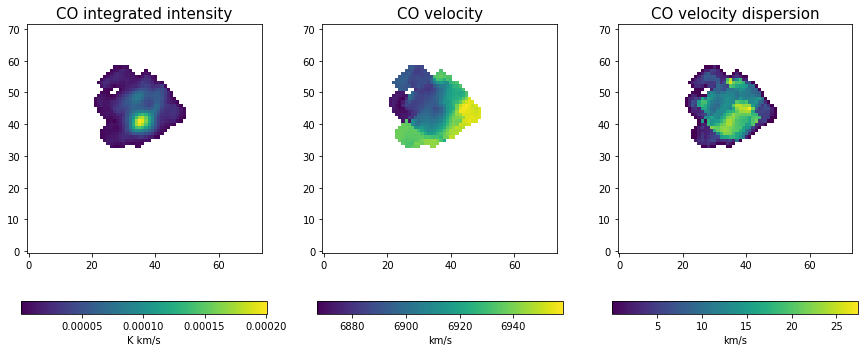

In [15]:
fig, axs = plt.subplots(1,3,figsize=(15,6))#,subplot_kw={'projection':mom0.wcs})
for ax,mommap,title,label in zip(axs.ravel(),[mom0,mom1,mom2],
                                 ['integrated intensity','velocity','velocity dispersion'],['K km/s','km/s','km/s']):
    im = ax.imshow(mommap,origin='lower')
    fig.colorbar(im,ax=ax,orientation='horizontal',label=label)
    ax.set_title('CO '+title,fontsize=15)
    #ax.coords['ra'].set_axislabel('RA')
    #ax.coords['dec'].set_axislabel('DEC')
#fig.tight_layout()
plt.show()

## Create individual CALIFA maps

In [39]:
hdu_list = fits.open(path+source+'.Pipe3D.cube.fits')
califa_hdr = WCS(hdu_list[0].header).celestial.to_header()

In [51]:
califa_hdr['OBJECT'] = source
califa_hdr['INSTRUME'] = 'PPAK'
califa_hdr['BMAJ'] = 2.5#/3600
califa_hdr['BMIN'] = 2.5#/3600

In [41]:
califa_hdr

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 69.0 / Pixel coordinate of reference point            
CRPIX2  =                 63.0 / Pixel coordinate of reference point            
PC1_1   = -0.00013888888888888 / Coordinate transformation matrix element       
PC2_2   =  0.00013888888888889 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =      343.89969609664 / [deg] Coordinate value at reference point      
CRVAL2  =      12.7896050010

In [42]:
gaia = hdu_list[7].data
region = hdu_list[8].data
region = region&np.where(gaia!=0,0,1)

In [56]:
# fluxes in 10^-16 erg s^-1 cm^-2
F_NII = hdu_list[5].data[46]
F_OIII = hdu_list[5].data[26]
F_Ha = hdu_list[5].data[45]
F_Hb = hdu_list[5].data[28]
eF_NII = hdu_list[5].data[262]
eF_OIII = hdu_list[5].data[242]
eF_Ha = hdu_list[5].data[261]
eF_Hb = hdu_list[5].data[244]

# EW in Angstrom
EW_Ha = -hdu_list[5].data[207] # emission line EW defined as negative
eEW_Ha = hdu_list[5].data[423]

# obtaining stellar mass by correcting with dezonification zone
M_star = np.power(10,hdu_list[1].data[19])*hdu_list[1].data[2]
eM_star = np.power(10,hdu_list[1].data[20])*hdu_list[1].data[2]

In [57]:
for frame in [F_Ha,F_Hb,F_OIII,F_NII,EW_Ha,M_star,
              eF_Ha,eF_Hb,eF_OIII,eF_NII,eEW_Ha,eM_star]:
    frame[region<1] = np.nan

In [58]:
# masking according to Ha_EW>6A and Ha_EW S/N>1
Ha_mask = (EW_Ha/eEW_Ha>1)&(EW_Ha>6)

In [59]:
fits.writeto(path+source+'_region.fits', region&1, califa_hdr,overwrite=True)
fits.writeto(path+source+'_Ha_mask.fits',Ha_mask&1,califa_hdr,overwrite=True)

In [60]:
fits.writeto(path+source+'_Mstar.fits', M_star,califa_hdr,overwrite=True)
fits.writeto(path+source+'_F_NII.fits', F_NII, califa_hdr,overwrite=True)
fits.writeto(path+source+'_F_OIII.fits',F_OIII,califa_hdr,overwrite=True)
fits.writeto(path+source+'_F_Ha.fits',  F_Ha,  califa_hdr,overwrite=True)
fits.writeto(path+source+'_F_Hb.fits',  F_Hb,  califa_hdr,overwrite=True)

In [61]:
fits.writeto(path+source+'_eMstar.fits',eM_star,califa_hdr,overwrite=True)
fits.writeto(path+source+'_eF_NII.fits', eF_NII, califa_hdr,overwrite=True)
fits.writeto(path+source+'_eF_OIII.fits',eF_OIII,califa_hdr,overwrite=True)
fits.writeto(path+source+'_eF_Ha.fits',  eF_Ha,  califa_hdr,overwrite=True)
fits.writeto(path+source+'_eF_Hb.fits',  eF_Hb,  califa_hdr,overwrite=True)

In [ ]:
hdr.set('BUNIT',timestamp)